In [1]:
import sys

sys.path.append("../")

In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
from rumboost.rumboost import rum_train
from rumboost.datasets import load_preprocess_LPMC
from rumboost.metrics import cross_entropy
from rumboost.utility_smoothing import optimal_knots_position, map_x_knots, smooth_predict, updated_utility_collection
from rumboost.utility_plotting import plot_spline, weights_to_plot_v2, plot_VoT, plot_pop_VoT

import lightgbm
import numpy as np
import hyperopt

# Example: Utility smoothing with LOESS

In [6]:
#load dataset
LPMC_train, LPMC_test, folds = load_preprocess_LPMC(path="../Data/")

## Utility smoothing

The utility is smoothed using LOESS (Locally Estimated Scatterplot Smoothing). Instead of using piecewise cubic Hermite splines, LOESS applies a weighted regression locally to smooth the function. It uses a locally weighted least squares approach where points close to each other have a higher influence.

### Training of a RUMBoost model

As smoothing is a post-processing tool, we first need to train a RUMBoost model. Therefore, we train the final model from the example simple_rumboost.

In [7]:
# parameters
general_params = {
    "n_jobs": -1,
    "num_classes": 4,  # important
    "verbosity": 1,  # specific RUMBoost parameter
    "num_iterations": 1276,
}

In [8]:
rum_structure = [
    {
        "utility": [0],
        "variables": [
            "age",
            "female",
            "day_of_week",
            "start_time_linear",
            "car_ownership",
            "driving_license",
            "purpose_B",
            "purpose_HBE",
            "purpose_HBO",
            "purpose_HBW",
            "purpose_NHBO",
            "fueltype_Average",
            "fueltype_Diesel",
            "fueltype_Hybrid",
            "fueltype_Petrol",
            "distance",
            "dur_walking",
        ],
        "boosting_params": {
            "monotone_constraints_method": "advanced",
            "max_depth": 1,
            "n_jobs": -1,
            "learning_rate": 0.1,
            "monotone_constraints": [
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                -1,
                -1,
            ],
            "interaction_constraints": [
                [0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
            ],
        },
        "shared": False,
    },
    {
        "utility": [1],
        "variables": [
            "age",
            "female",
            "day_of_week",
            "start_time_linear",
            "car_ownership",
            "driving_license",
            "purpose_B",
            "purpose_HBE",
            "purpose_HBO",
            "purpose_HBW",
            "purpose_NHBO",
            "fueltype_Average",
            "fueltype_Diesel",
            "fueltype_Hybrid",
            "fueltype_Petrol",
            "distance",
            "dur_cycling",
        ],
        "boosting_params": {
            "monotone_constraints_method": "advanced",
            "max_depth": 1,
            "n_jobs": -1,
            "learning_rate": 0.1,
            "monotone_constraints": [
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                -1,
                -1,
            ],
            "interaction_constraints": [
                [0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
            ],
        },
        "shared": False,
    },
    {
        "utility": [2],
        "variables": [
            "age",
            "female",
            "day_of_week",
            "start_time_linear",
            "car_ownership",
            "driving_license",
            "purpose_B",
            "purpose_HBE",
            "purpose_HBO",
            "purpose_HBW",
            "purpose_NHBO",
            "fueltype_Average",
            "fueltype_Diesel",
            "fueltype_Hybrid",
            "fueltype_Petrol",
            "distance",
            "dur_pt_access",
            "dur_pt_bus",
            "dur_pt_rail",
            "dur_pt_int_waiting",
            "dur_pt_int_walking",
            "pt_n_interchanges",
            "cost_transit",
        ],
        "boosting_params": {
            "monotone_constraints_method": "advanced",
            "max_depth": 1,
            "n_jobs": -1,
            "learning_rate": 0.1,
            "monotone_constraints": [
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                -1,
                -1,
                -1,
                -1,
                -1,
                -1,
                -1,
                -1,
            ],
            "interaction_constraints": [
                [0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
                [20],
                [21],
                [22],
            ],
        },
        "shared": False,
    },
    {
        "utility": [3],
        "variables": [
            "age",
            "female",
            "day_of_week",
            "start_time_linear",
            "car_ownership",
            "driving_license",
            "purpose_B",
            "purpose_HBE",
            "purpose_HBO",
            "purpose_HBW",
            "purpose_NHBO",
            "fueltype_Average",
            "fueltype_Diesel",
            "fueltype_Hybrid",
            "fueltype_Petrol",
            "distance",
            "dur_driving",
            "cost_driving_fuel",
            "congestion_charge",
            "driving_traffic_percent",
        ],
        "boosting_params": {
            "monotone_constraints_method": "advanced",
            "max_depth": 1,
            "n_jobs": -1,
            "learning_rate": 0.1,
            "monotone_constraints": [
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                -1,
                -1,
                -1,
                -1,
                -1,
            ],
            "interaction_constraints": [
                [0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
            ],
        },
        "shared": False,
    },
]

In [9]:
model_specification = {
    "general_params": general_params,
    "rum_structure": rum_structure,
}

In [10]:
# features and label column names
features = [f for f in LPMC_train.columns if f != "choice"]
label = "choice"

# create lightgbm dataset
lgb_train_set = lightgbm.Dataset(
    LPMC_train[features], label=LPMC_train[label], free_raw_data=False
)
lgb_test_set = lightgbm.Dataset(
    LPMC_test[features], label=LPMC_test[label], free_raw_data=False
)

In [11]:
#train the model
LPMC_model_fully_trained = rum_train(lgb_train_set, model_specification)

#predicts classes on test set
preds = LPMC_model_fully_trained.predict(lgb_test_set)

#compute cross entropy on the test set
ce_test = cross_entropy(preds, lgb_test_set.get_label().astype(int))

print('-'*50)
print(f'Final negative cross-entropy on the test set: {ce_test}')

/Users/leovilardo/rumboost/examples/../rumboost/rumboost.py:1917: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 54766, number of used features: 17
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 54766, number of used features: 17
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1834
[LightGBM] [Info] Number of

### Hyperparameter search: optimal number of knots

The optimal number of knots is found with hyperopt. For computational purposes we show here only one iteration, but we ran that code with 25 iterations for the paper. Given a number of knots, the optimal positions of knots can be found with the ```optimal_knots_position()``` function.

**The basic settings for functions smoothing are**:

- First and last knots fixed
- Optimisation of the BIC
- Optimisation of the postion with scipy.minimize

In [12]:
param_space = {'0':{'distance': hyperopt.pyll.scope.int(hyperopt.hp.quniform('distance_0', 3, 7,1)),
                    'dur_walking': hyperopt.pyll.scope.int(hyperopt.hp.quniform('dur_walking', 3, 7,1))},
            '1':{'distance': hyperopt.pyll.scope.int(hyperopt.hp.quniform('distance_1', 3, 7,1)),
                    'dur_cycling': hyperopt.pyll.scope.int(hyperopt.hp.quniform('dur_cycling', 3, 7,1))},
            '2':{'cost_transit': hyperopt.pyll.scope.int(hyperopt.hp.quniform('cost_transit', 3, 7,1)),
                    #'distance': hyperopt.pyll.scope.int(hyperopt.hp.quniform('distance_2', 3, 7,1)),
                    'dur_pt_access': hyperopt.pyll.scope.int(hyperopt.hp.quniform('dur_pt_access', 3, 7,1)),
                    'dur_pt_bus': hyperopt.pyll.scope.int(hyperopt.hp.quniform('dur_pt_bus', 3, 7,1)),
                    'dur_pt_int_waiting': hyperopt.pyll.scope.int(hyperopt.hp.quniform('dur_pt_int_waiting', 3, 7,1)),
                    'dur_pt_int_walking': hyperopt.pyll.scope.int(hyperopt.hp.quniform('dur_pt_int_walking', 3, 7,1)),
                    'dur_pt_rail': hyperopt.pyll.scope.int(hyperopt.hp.quniform('dur_pt_rail', 3, 7,1))},
            '3':{'cost_driving_fuel': hyperopt.pyll.scope.int(hyperopt.hp.quniform('cost_driving_fuel', 3, 7,1)),
                    'distance': hyperopt.pyll.scope.int(hyperopt.hp.quniform('distance_3', 3, 7,1)),
                    'driving_traffic_percent': hyperopt.pyll.scope.int(hyperopt.hp.quniform('driving_traffic_percent', 3, 7,1)),
                    'dur_driving': hyperopt.pyll.scope.int(hyperopt.hp.quniform('dur_driving', 3, 7,1))}
                }

#optimal number of splines (number of knots-1)
#param_space = {'0':{'distance': 5,
#                    'dur_walking': 5},
#            '1':{'distance': 5,
#                    'dur_cycling': 6},
#            '2':{'cost_transit': 3,
#                    #'distance': 5,
#                    'dur_pt_access': 3,
#                    'dur_pt_bus': 3,
#                    'dur_pt_int_waiting': 7,
#                    'dur_pt_int_walking': 6,
#                    'dur_pt_rail': 3},
#            '3':{'cost_driving_fuel': 5,
#                    'distance': 3,
#                    'driving_traffic_percent': 7,
#                    'dur_driving': 4}
#                }

Optimisation of knots position for hyperopt

In [13]:
def objective(space):
    dataset_train, _, _ = load_preprocess_LPMC(path="../Data/")
        
    weights = weights_to_plot_v2(LPMC_model_fully_trained)

    spline_utilities = {'0':['distance', 'dur_walking'],'1':['distance', 'dur_cycling'], '2':['distance', 'dur_pt_rail', 'dur_pt_bus', 'cost_transit', 'dur_pt_access', 'dur_pt_int_walking', 'dur_pt_int_waiting'], '3': ['distance', 'dur_driving','cost_driving_fuel', 'driving_traffic_percent']}

    target = 'choice'

    spline_collection = space

    x_opt, x_first, x_last, loss = optimal_knots_position(weights, dataset_train, dataset_train, dataset_train[target], spline_utilities, spline_collection, max_iter = 200, optimise = True, n_iter=1, first_last_knot_fixed=True)

    return {'loss': loss, 'x_opt':x_opt.x, 'status': hyperopt.STATUS_OK, 'x_first': x_first, 'x_last': x_last}

# n=25
n=1
trials = hyperopt.Trials()
best_classifier = hyperopt.fmin(fn=objective,
                                space=param_space,
                                algo=hyperopt.tpe.suggest,
                                max_evals=n,
                                trials=trials)

best_classifier['_best_loss'] = trials.best_trial['result']['loss']
best_classifier['_x_opt'] = trials.best_trial['result']['x_opt']
best_classifier['_x_first'] = trials.best_trial['result']['x_first']
best_classifier['_x_last'] = trials.best_trial['result']['x_last']

  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

/Users/leovilardo/rumboost/venv/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "



## Testing on out-of-sample data

Given the optimal knot position, we can validate our approach by computing the cross entropy loss on out-of-sample data. 
This can vary from the value displayed in the paper due to randomness in the optimisation solver

In [1]:
weights = weights_to_plot_v2(LPMC_model_fully_trained)

spline_collection = {'0':{'distance': int(best_classifier['distance_0']),
                    'dur_walking': int(best_classifier['dur_walking'])},
            '1':{'distance': int(best_classifier['distance_1']),
                    'dur_cycling': int(best_classifier['dur_cycling'])},
            '2':{'cost_transit': int(best_classifier['cost_transit']),
                    #'distance': int(best_classifier['distance_2']),
                    'dur_pt_access': int(best_classifier['dur_pt_access']),
                    'dur_pt_bus': int(best_classifier['dur_pt_bus']),
                    'dur_pt_int_waiting': int(best_classifier['dur_pt_int_waiting']),
                    'dur_pt_int_walking': int(best_classifier['dur_pt_int_walking']),
                    'dur_pt_rail': int(best_classifier['dur_pt_rail'])},
            '3':{'cost_driving_fuel': int(best_classifier['cost_driving_fuel']),
                    'distance': int(best_classifier['distance_3']),
                    'driving_traffic_percent': int(best_classifier['driving_traffic_percent']),
                    'dur_driving': int(best_classifier['dur_driving'])}
                }

print(f"Knot numbers: {spline_collection}")
#spline_collection = {'0':{'distance': 4,
#                    'dur_walking': 5},
#            '1':{'distance': 7,
#                    'dur_cycling': 6},
#            '2':{'cost_transit': 3,
#                    #'distance': 3,
#                    'dur_pt_access': 3,
#                    'dur_pt_bus': 7,
#                    'dur_pt_int_waiting': 4,
#                    'dur_pt_int_walking': 7,
#                    'dur_pt_rail': 3},
#            '3':{'cost_driving_fuel': 5,
#                    'distance': 3,
#                    'driving_traffic_percent': 7,
#                    'dur_driving': 4}
#                }
spline_utilities = {'0':['distance', 'dur_walking'],'1':['distance', 'dur_cycling'], '2':['dur_pt_rail', 'dur_pt_bus', 'cost_transit', 'dur_pt_int_waiting', 'dur_pt_int_walking', 'dur_pt_access'], '3': ['distance', 'dur_driving','cost_driving_fuel', 'driving_traffic_percent']}
x_knots_dict = map_x_knots(trials.best_trial['result']['x_opt'], spline_collection, trials.best_trial['result']['x_first'], trials.best_trial['result']['x_last'])
util_collection = loess_spline(weights, LPMC_train, spline_collection, spline_utilities, x_knots=x_knots_dict)

y_pred = smooth_predict(LPMC_test, util_collection)
CE_final = cross_entropy(y_pred, LPMC_test['choice'])
best_classifier['_on_test_set'] = CE_final

print(f'Smoothed final cross entropy loss: {CE_final}')

NameError: name 'weights_to_plot_v2' is not defined

## Plotting smoothed utility functions

We can use the result to plot the utility functions.

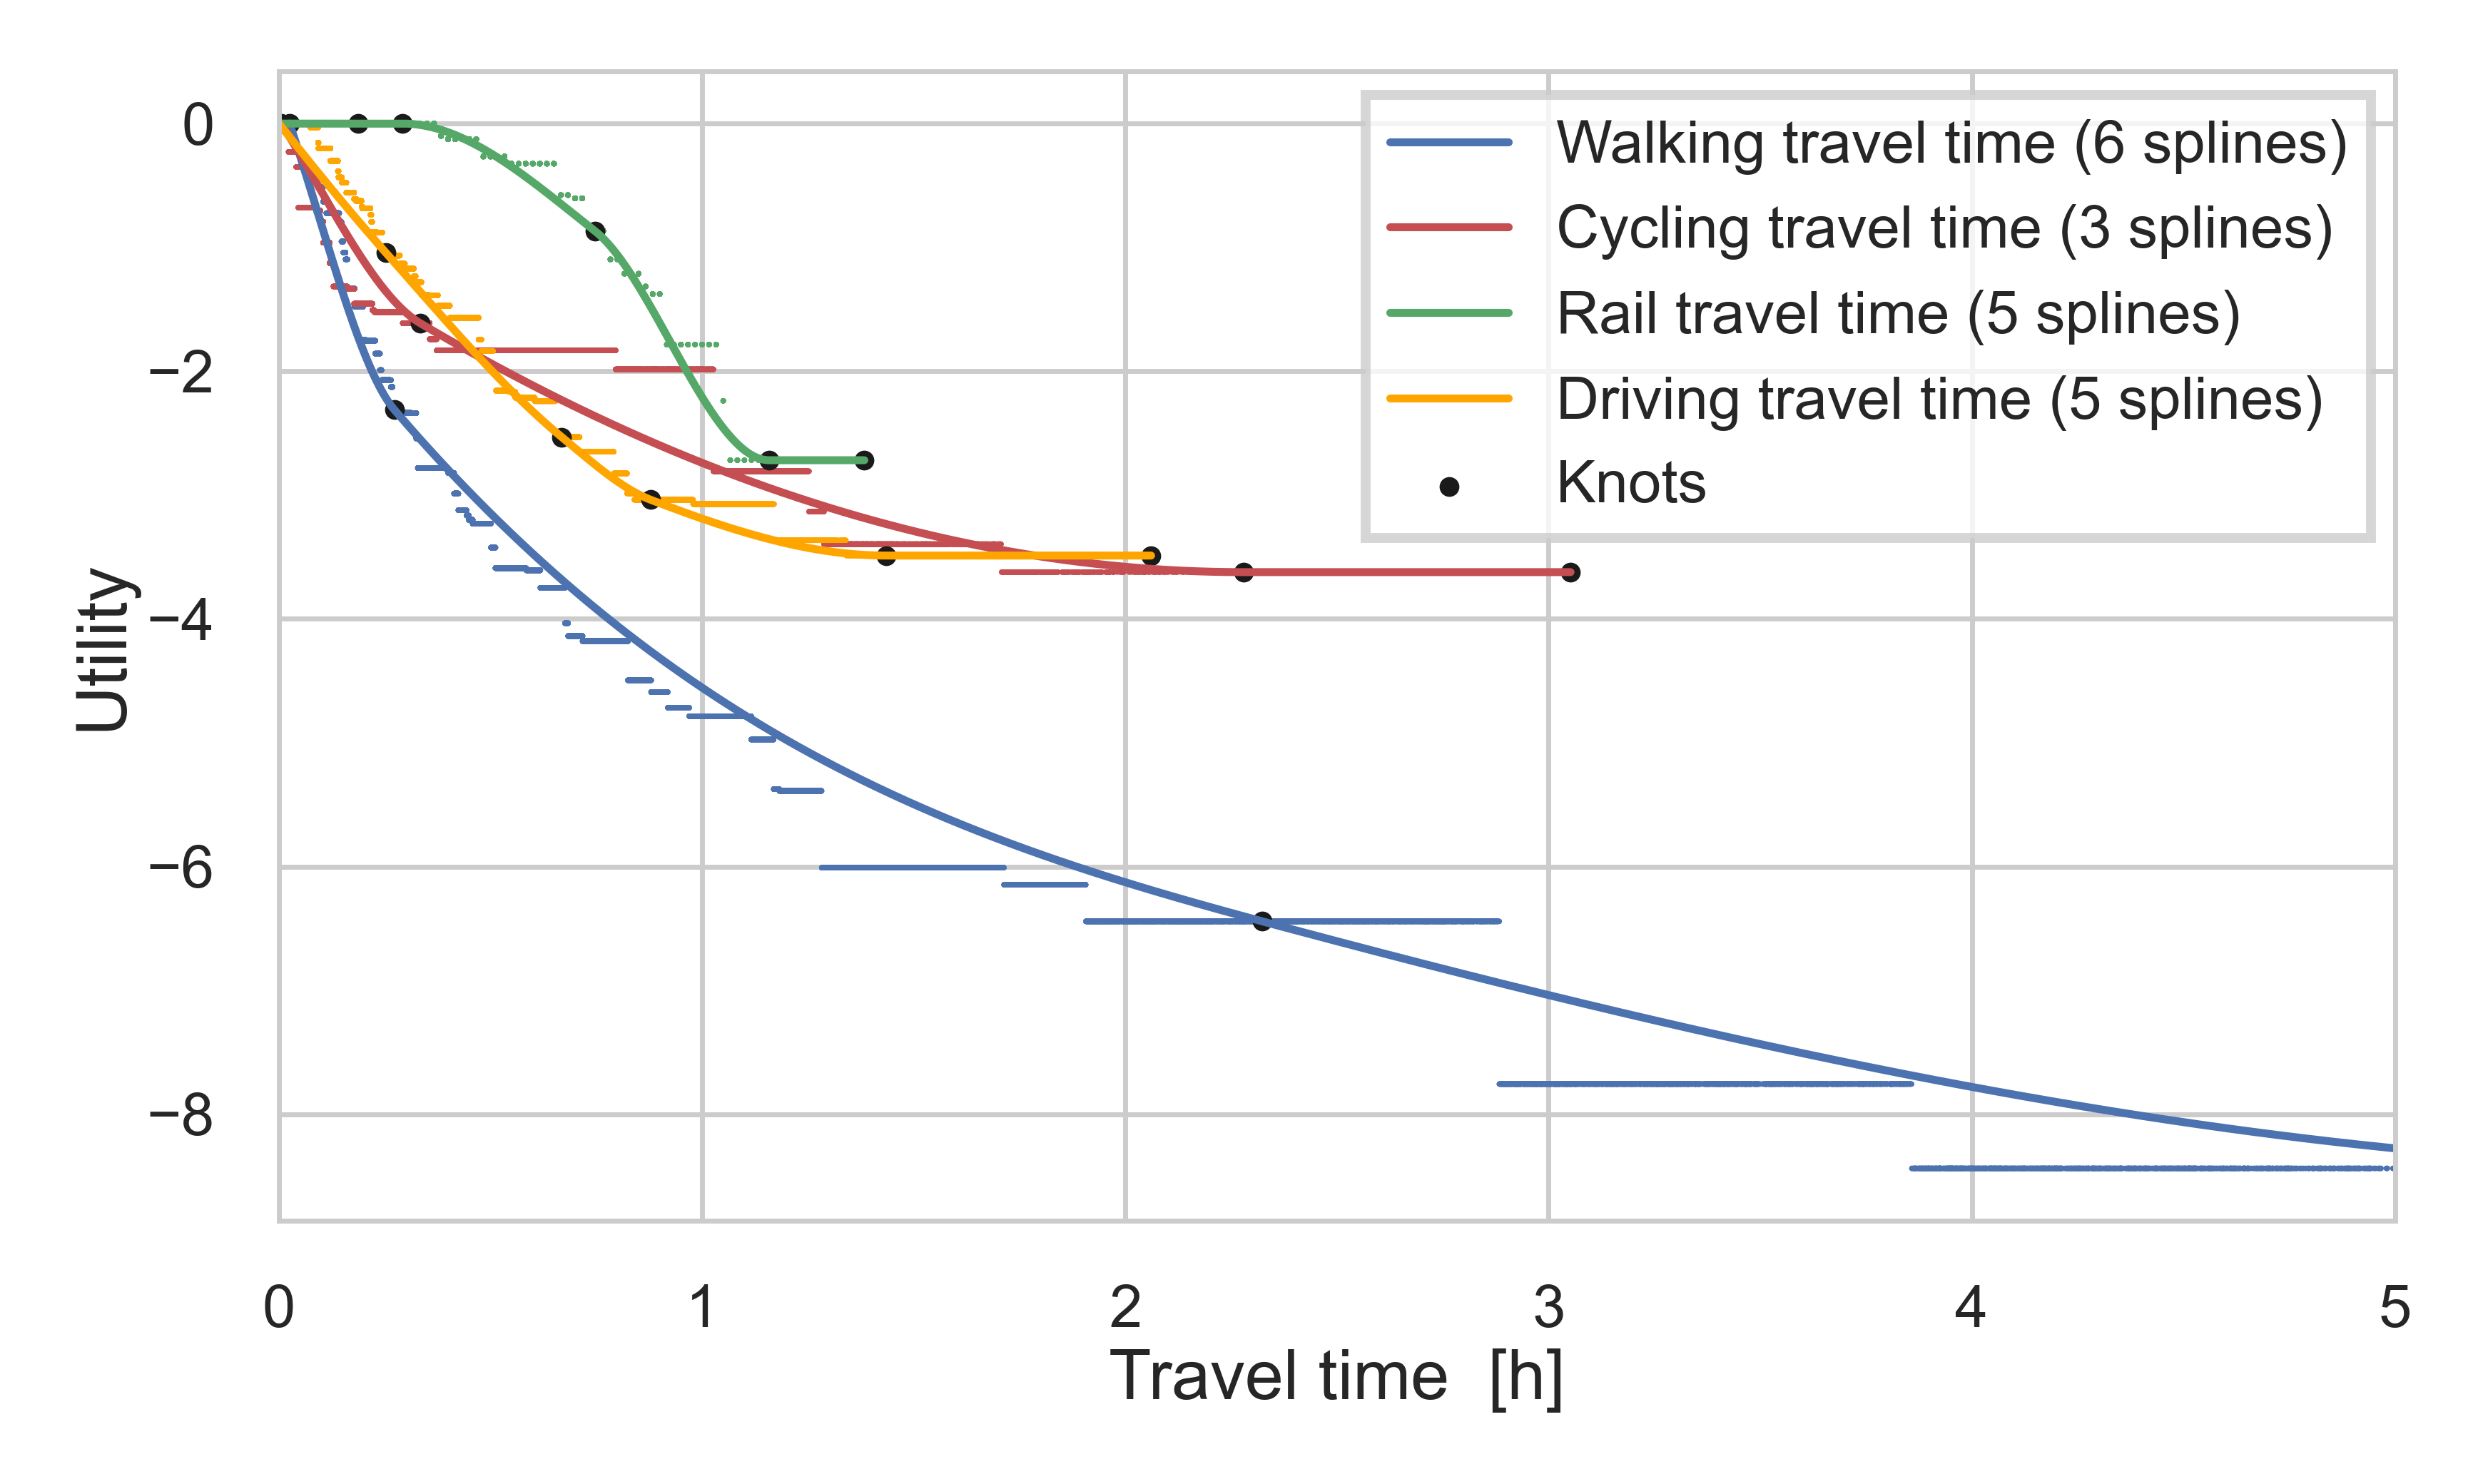

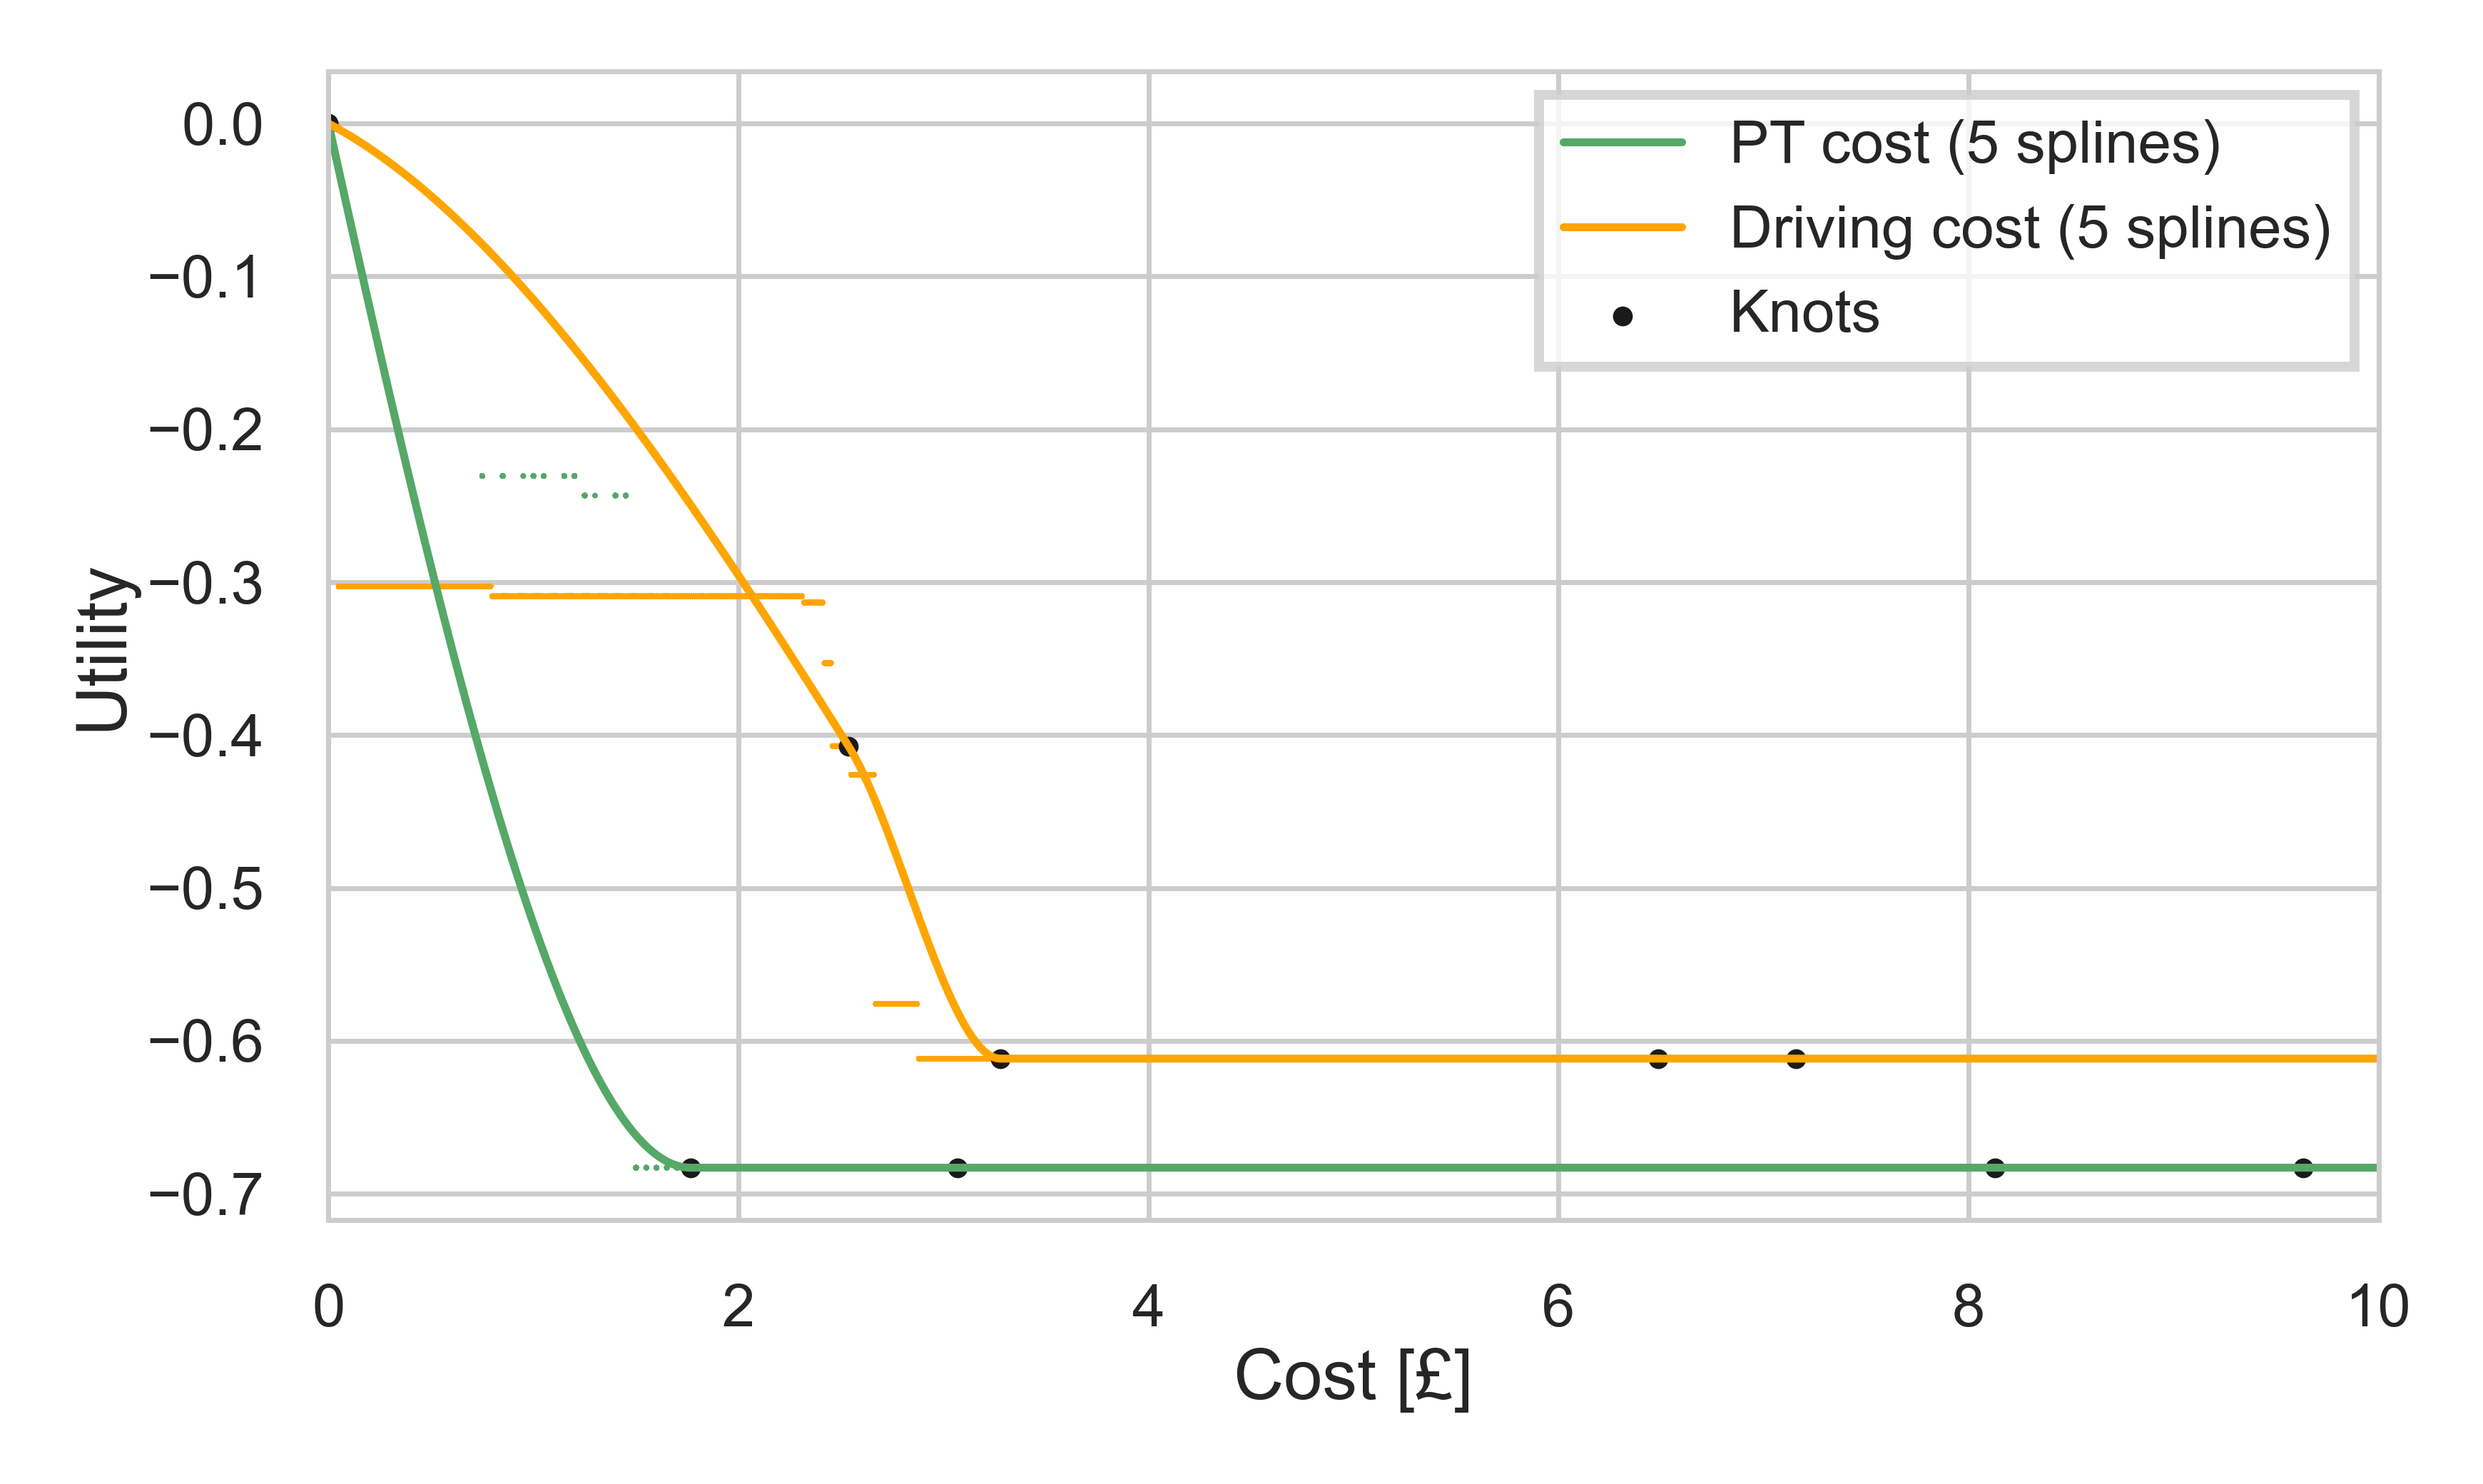

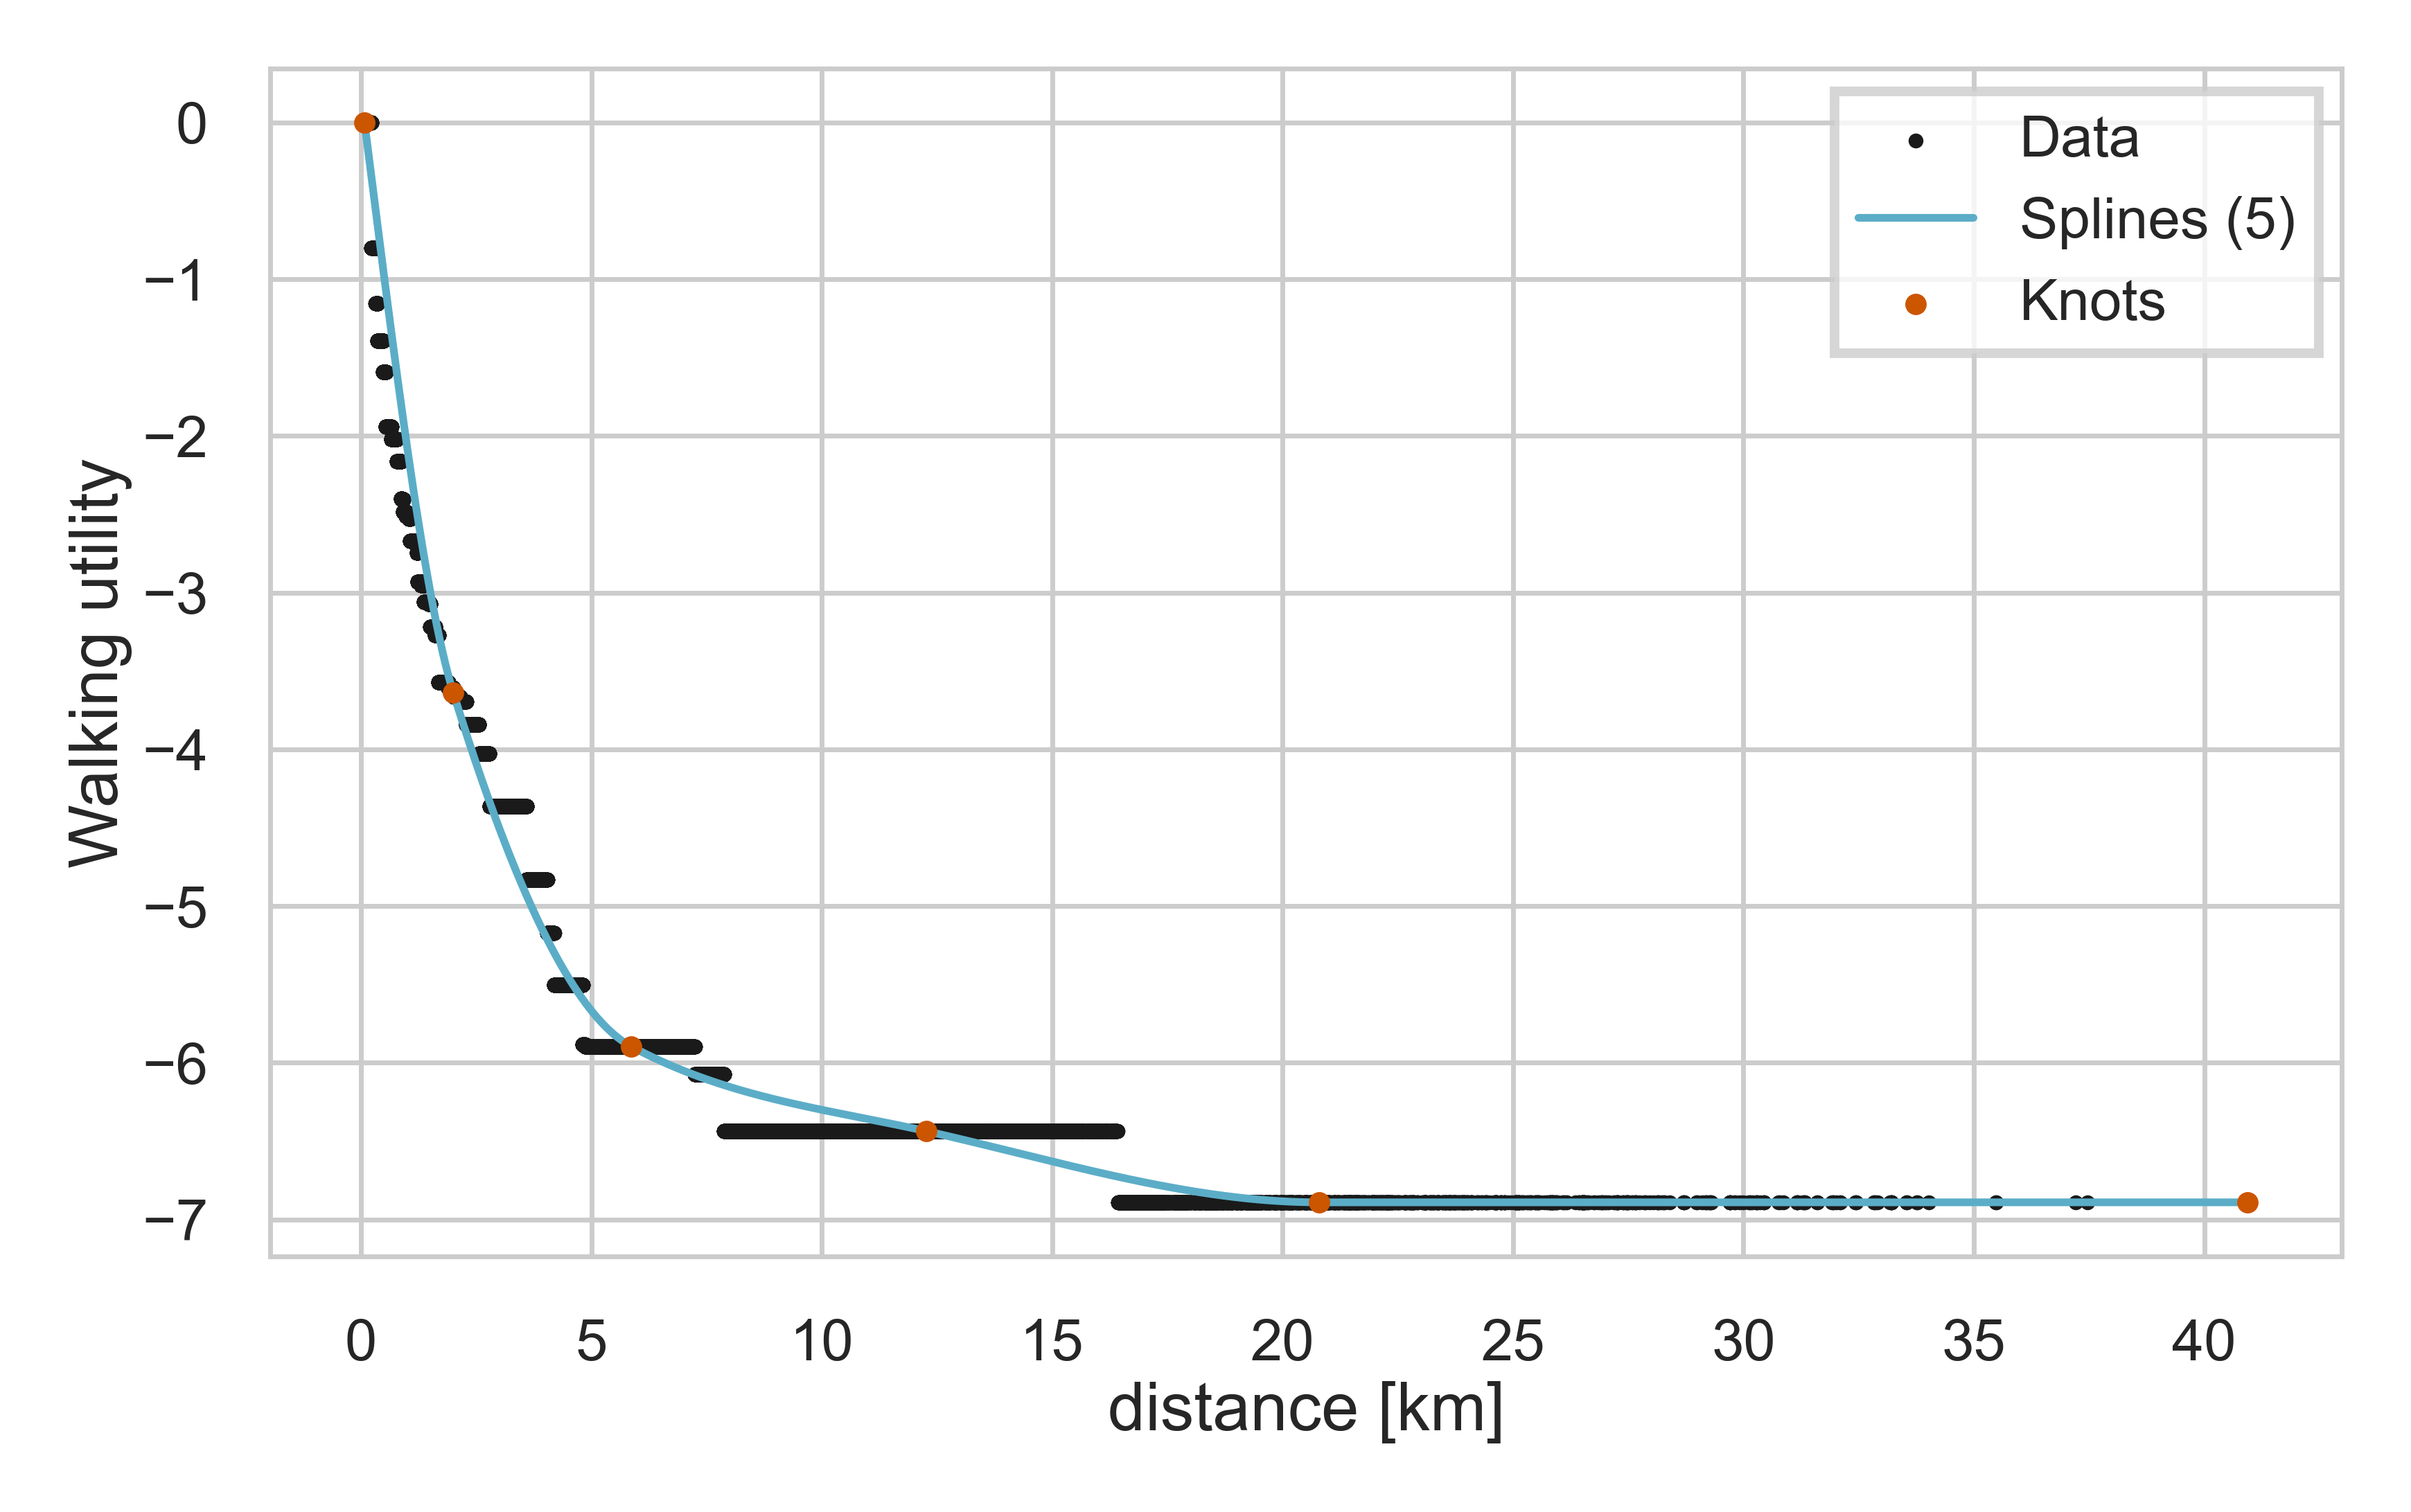

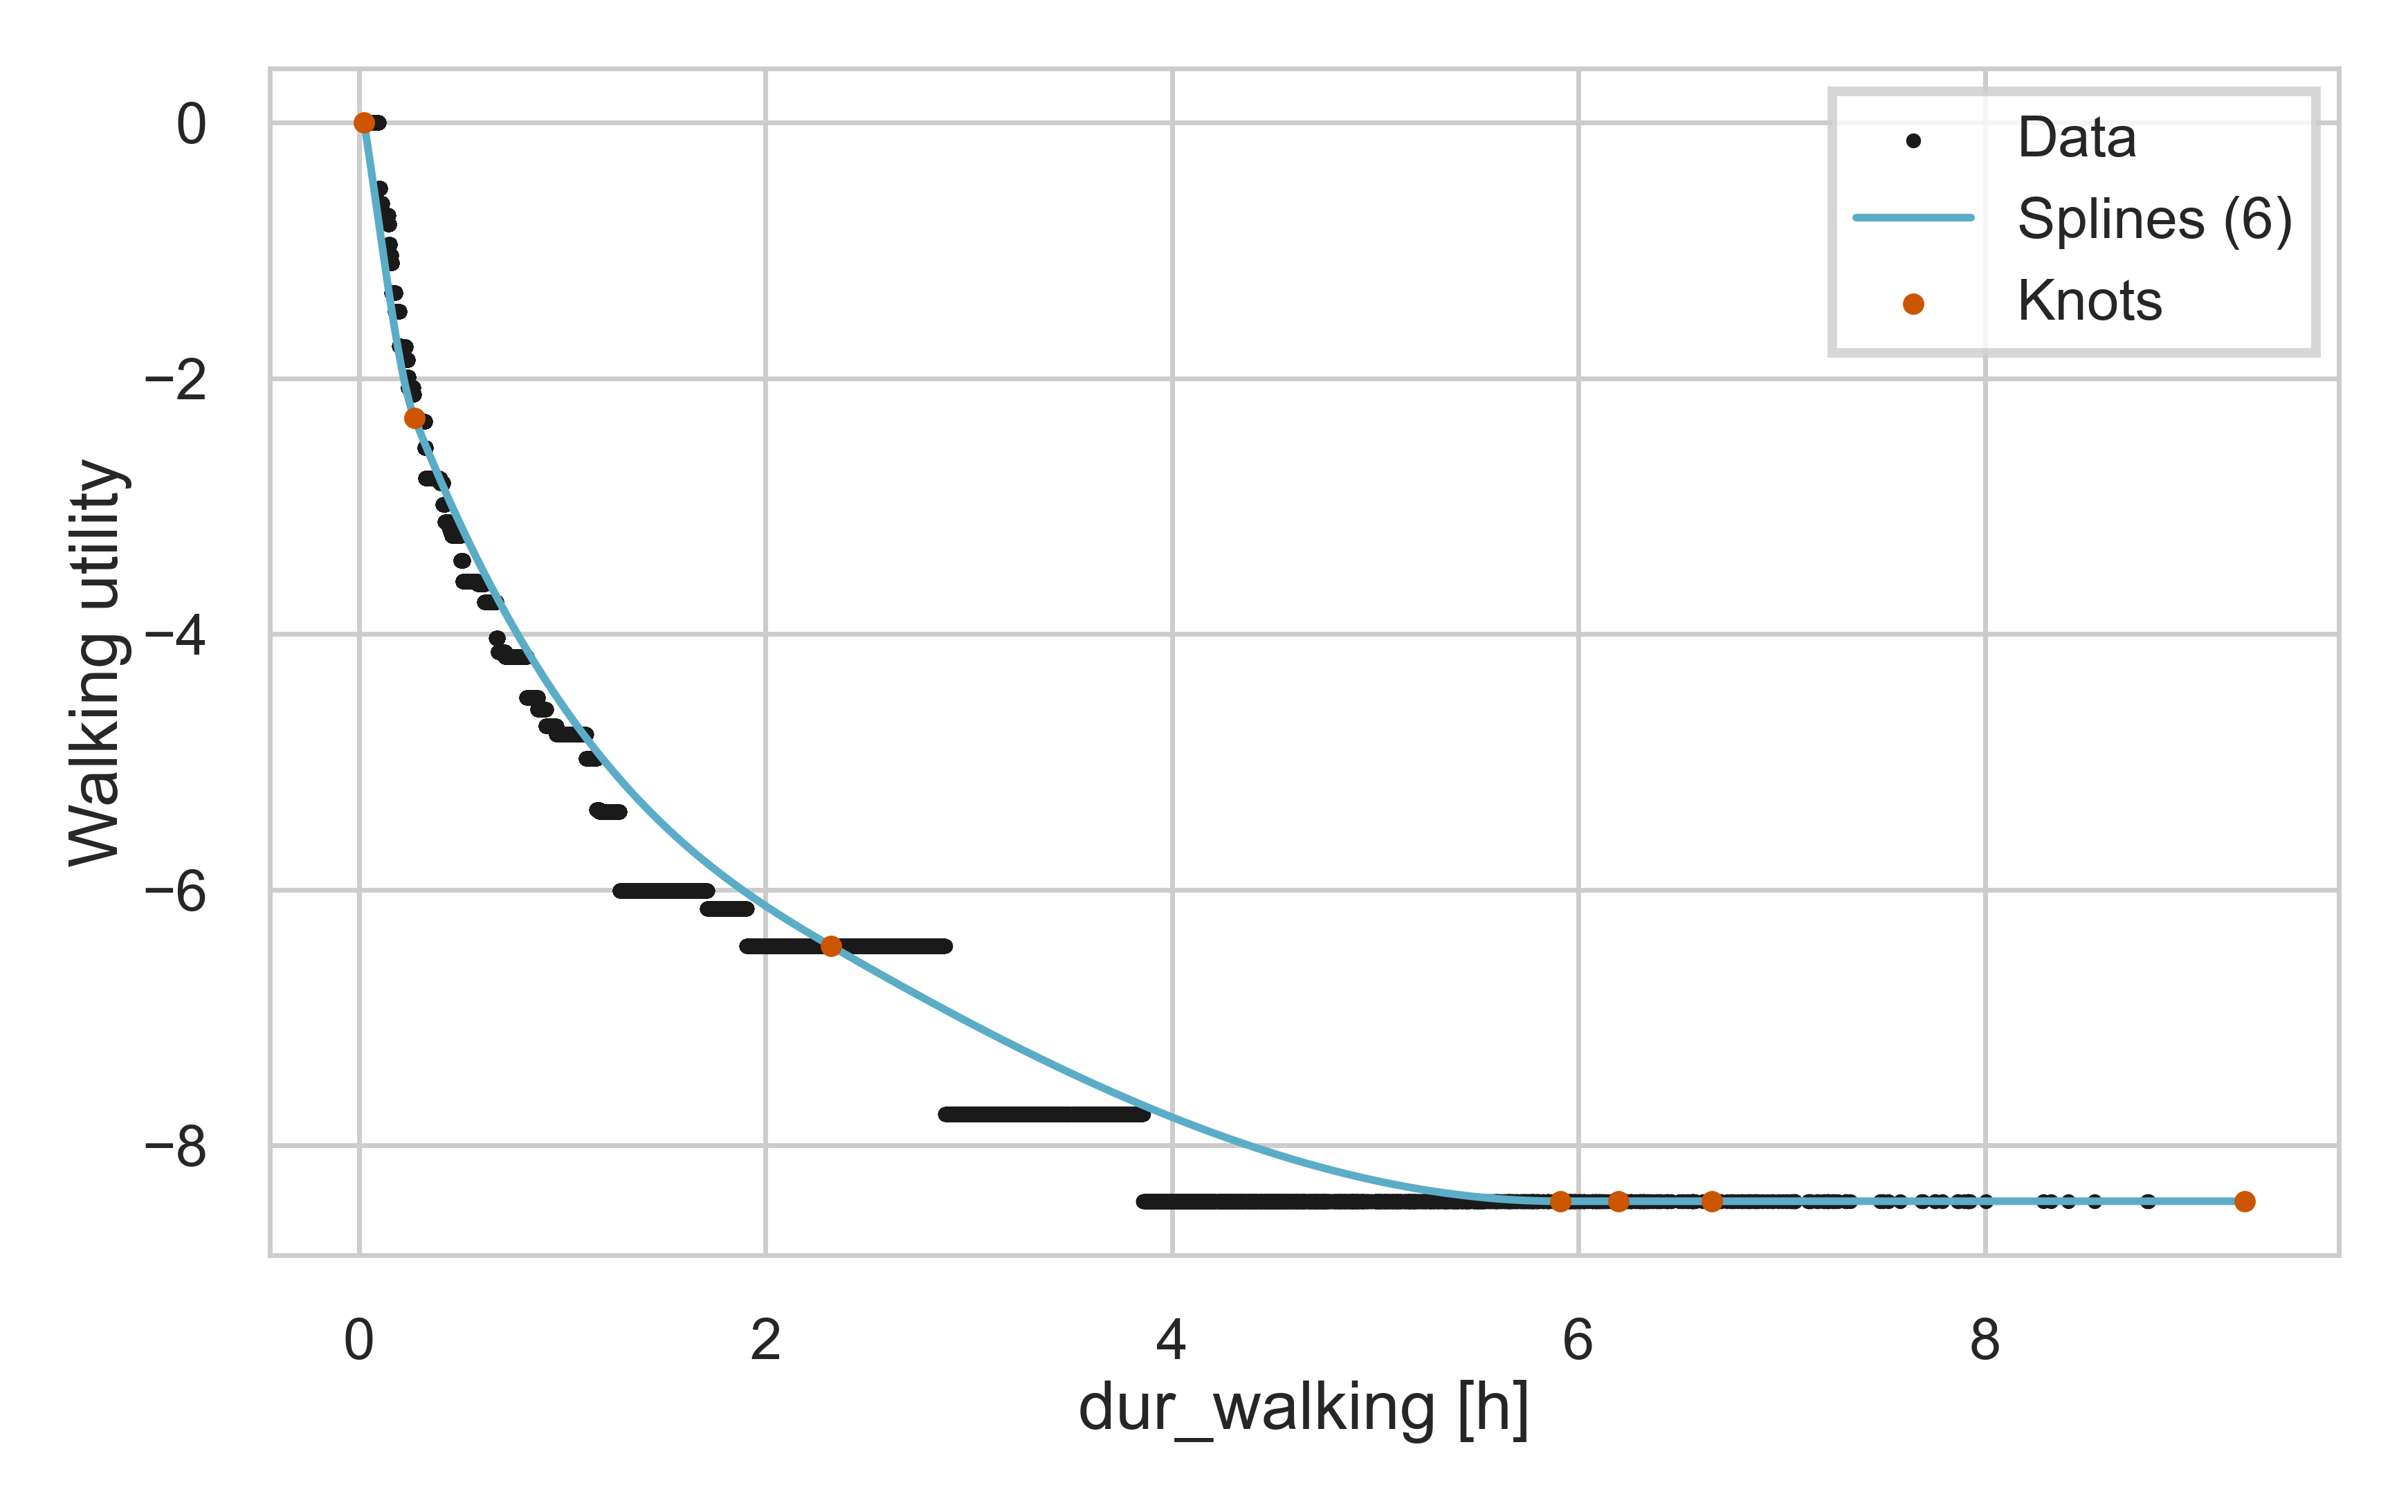

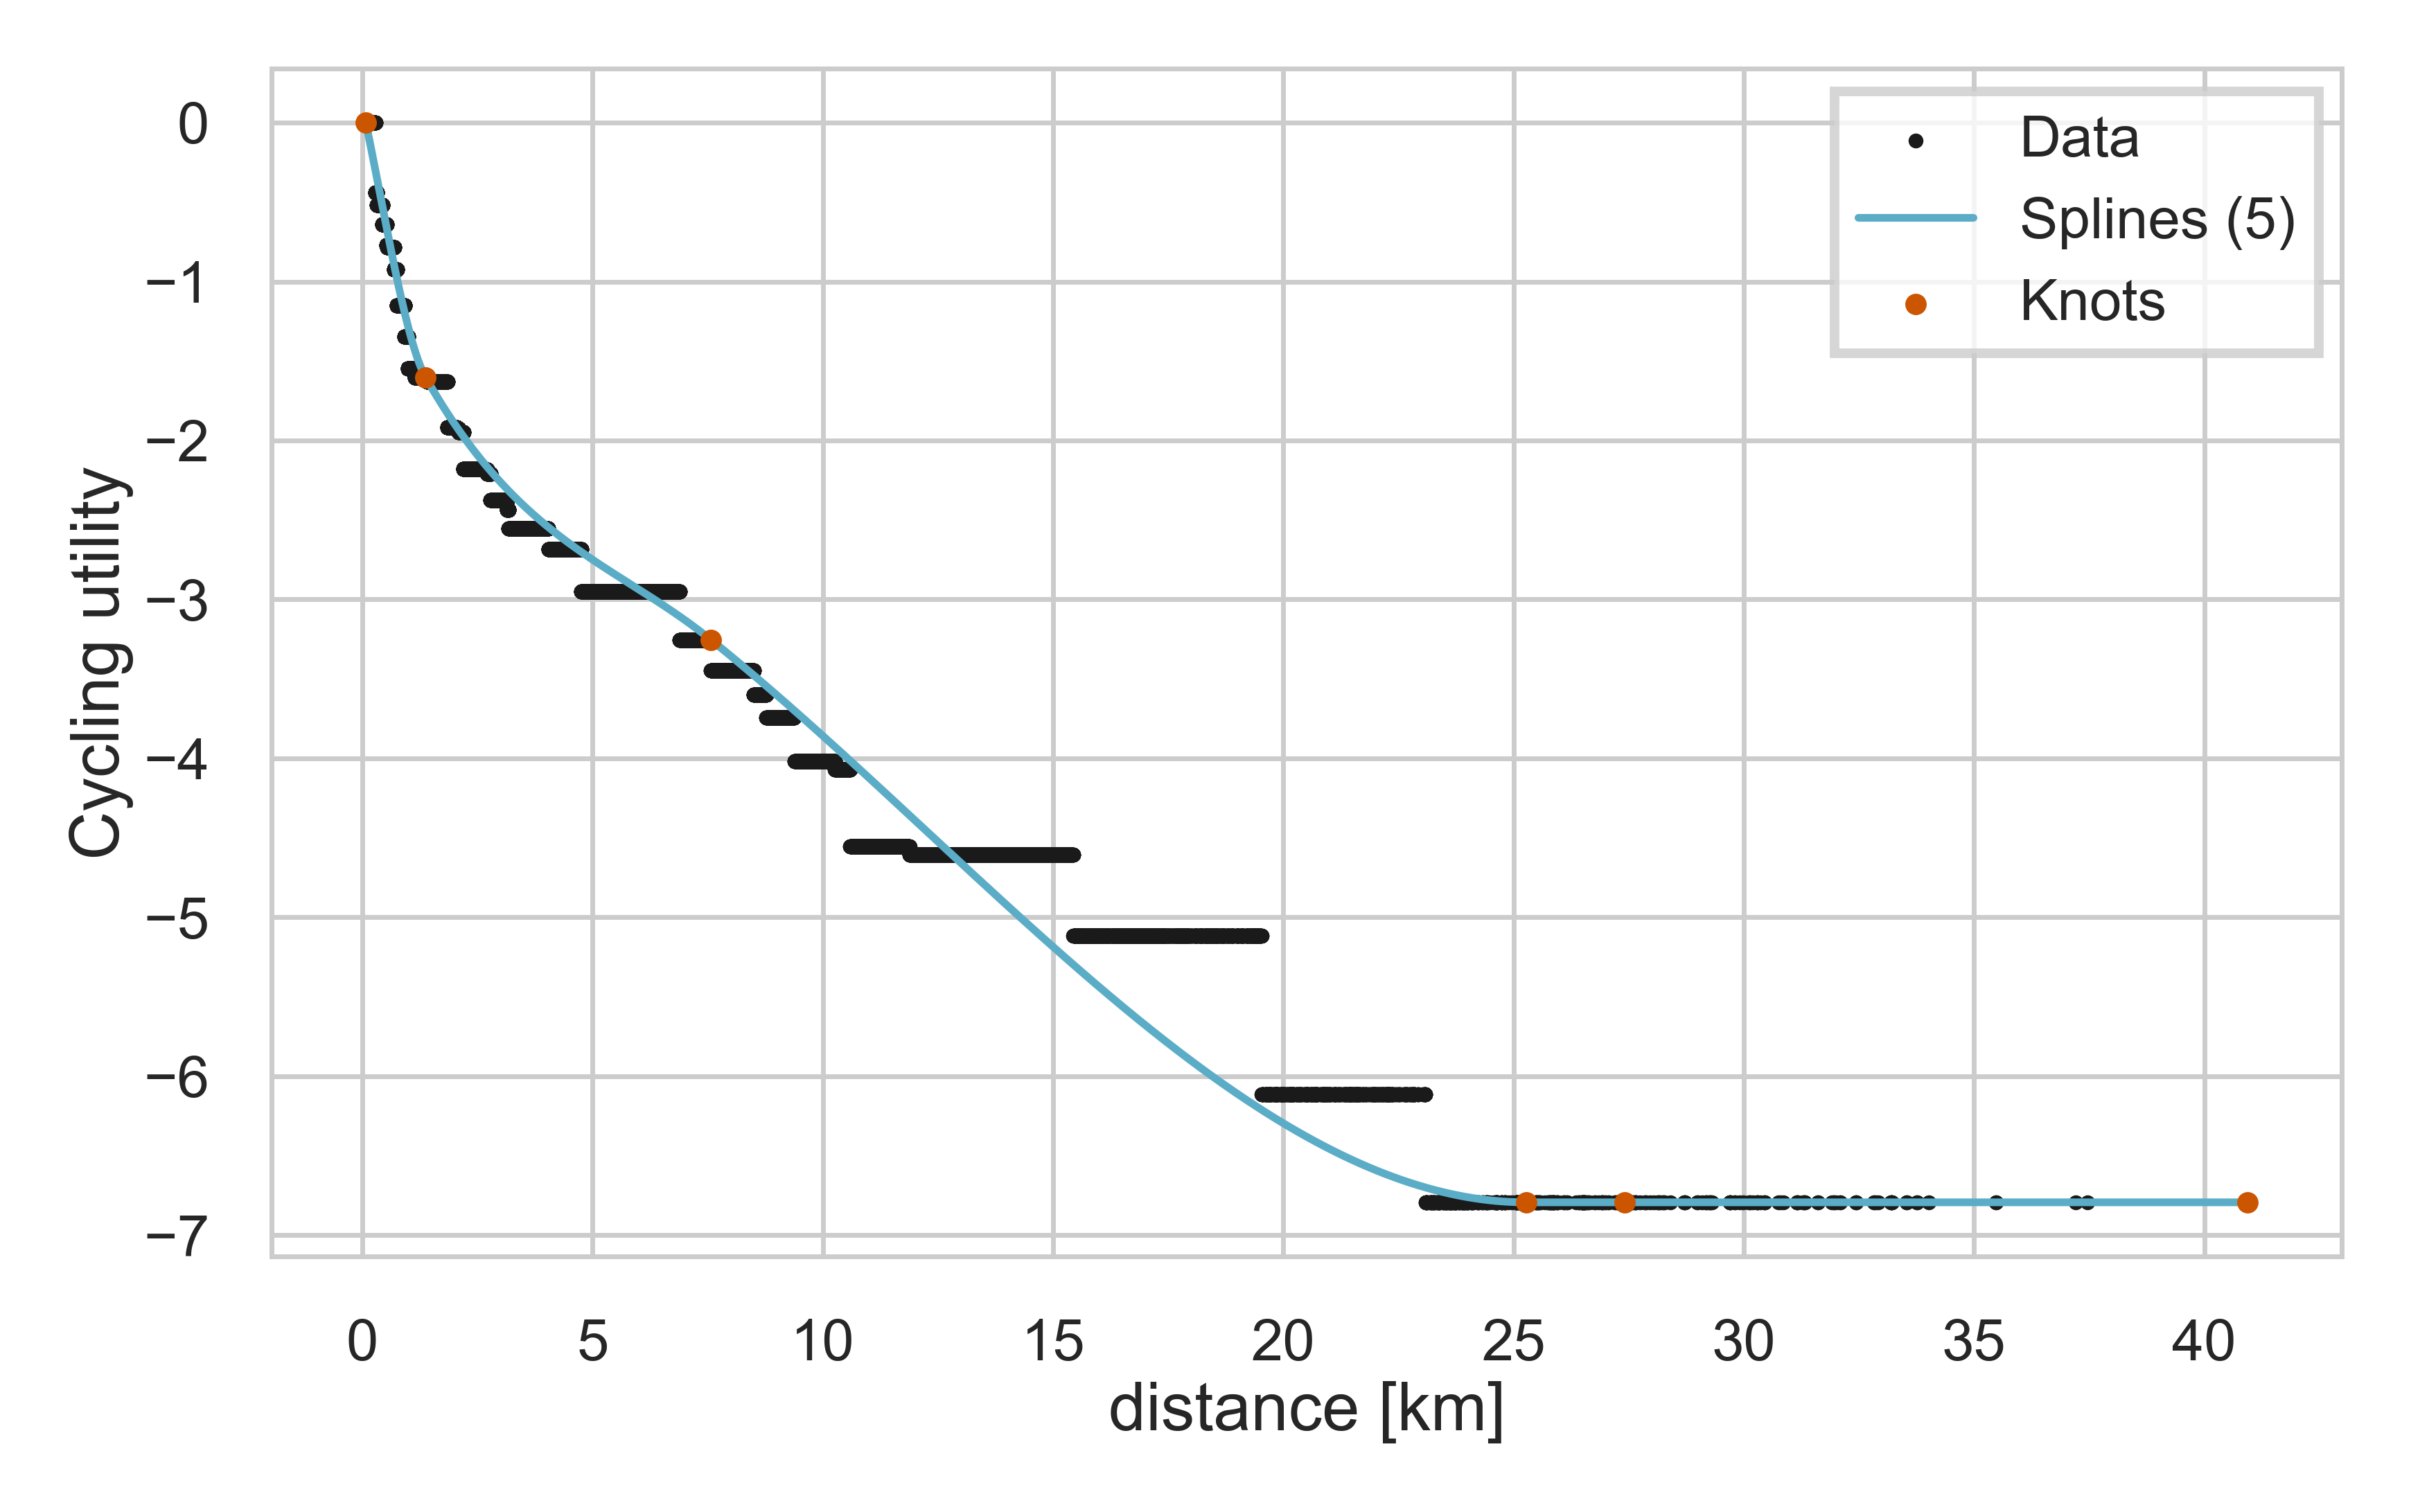

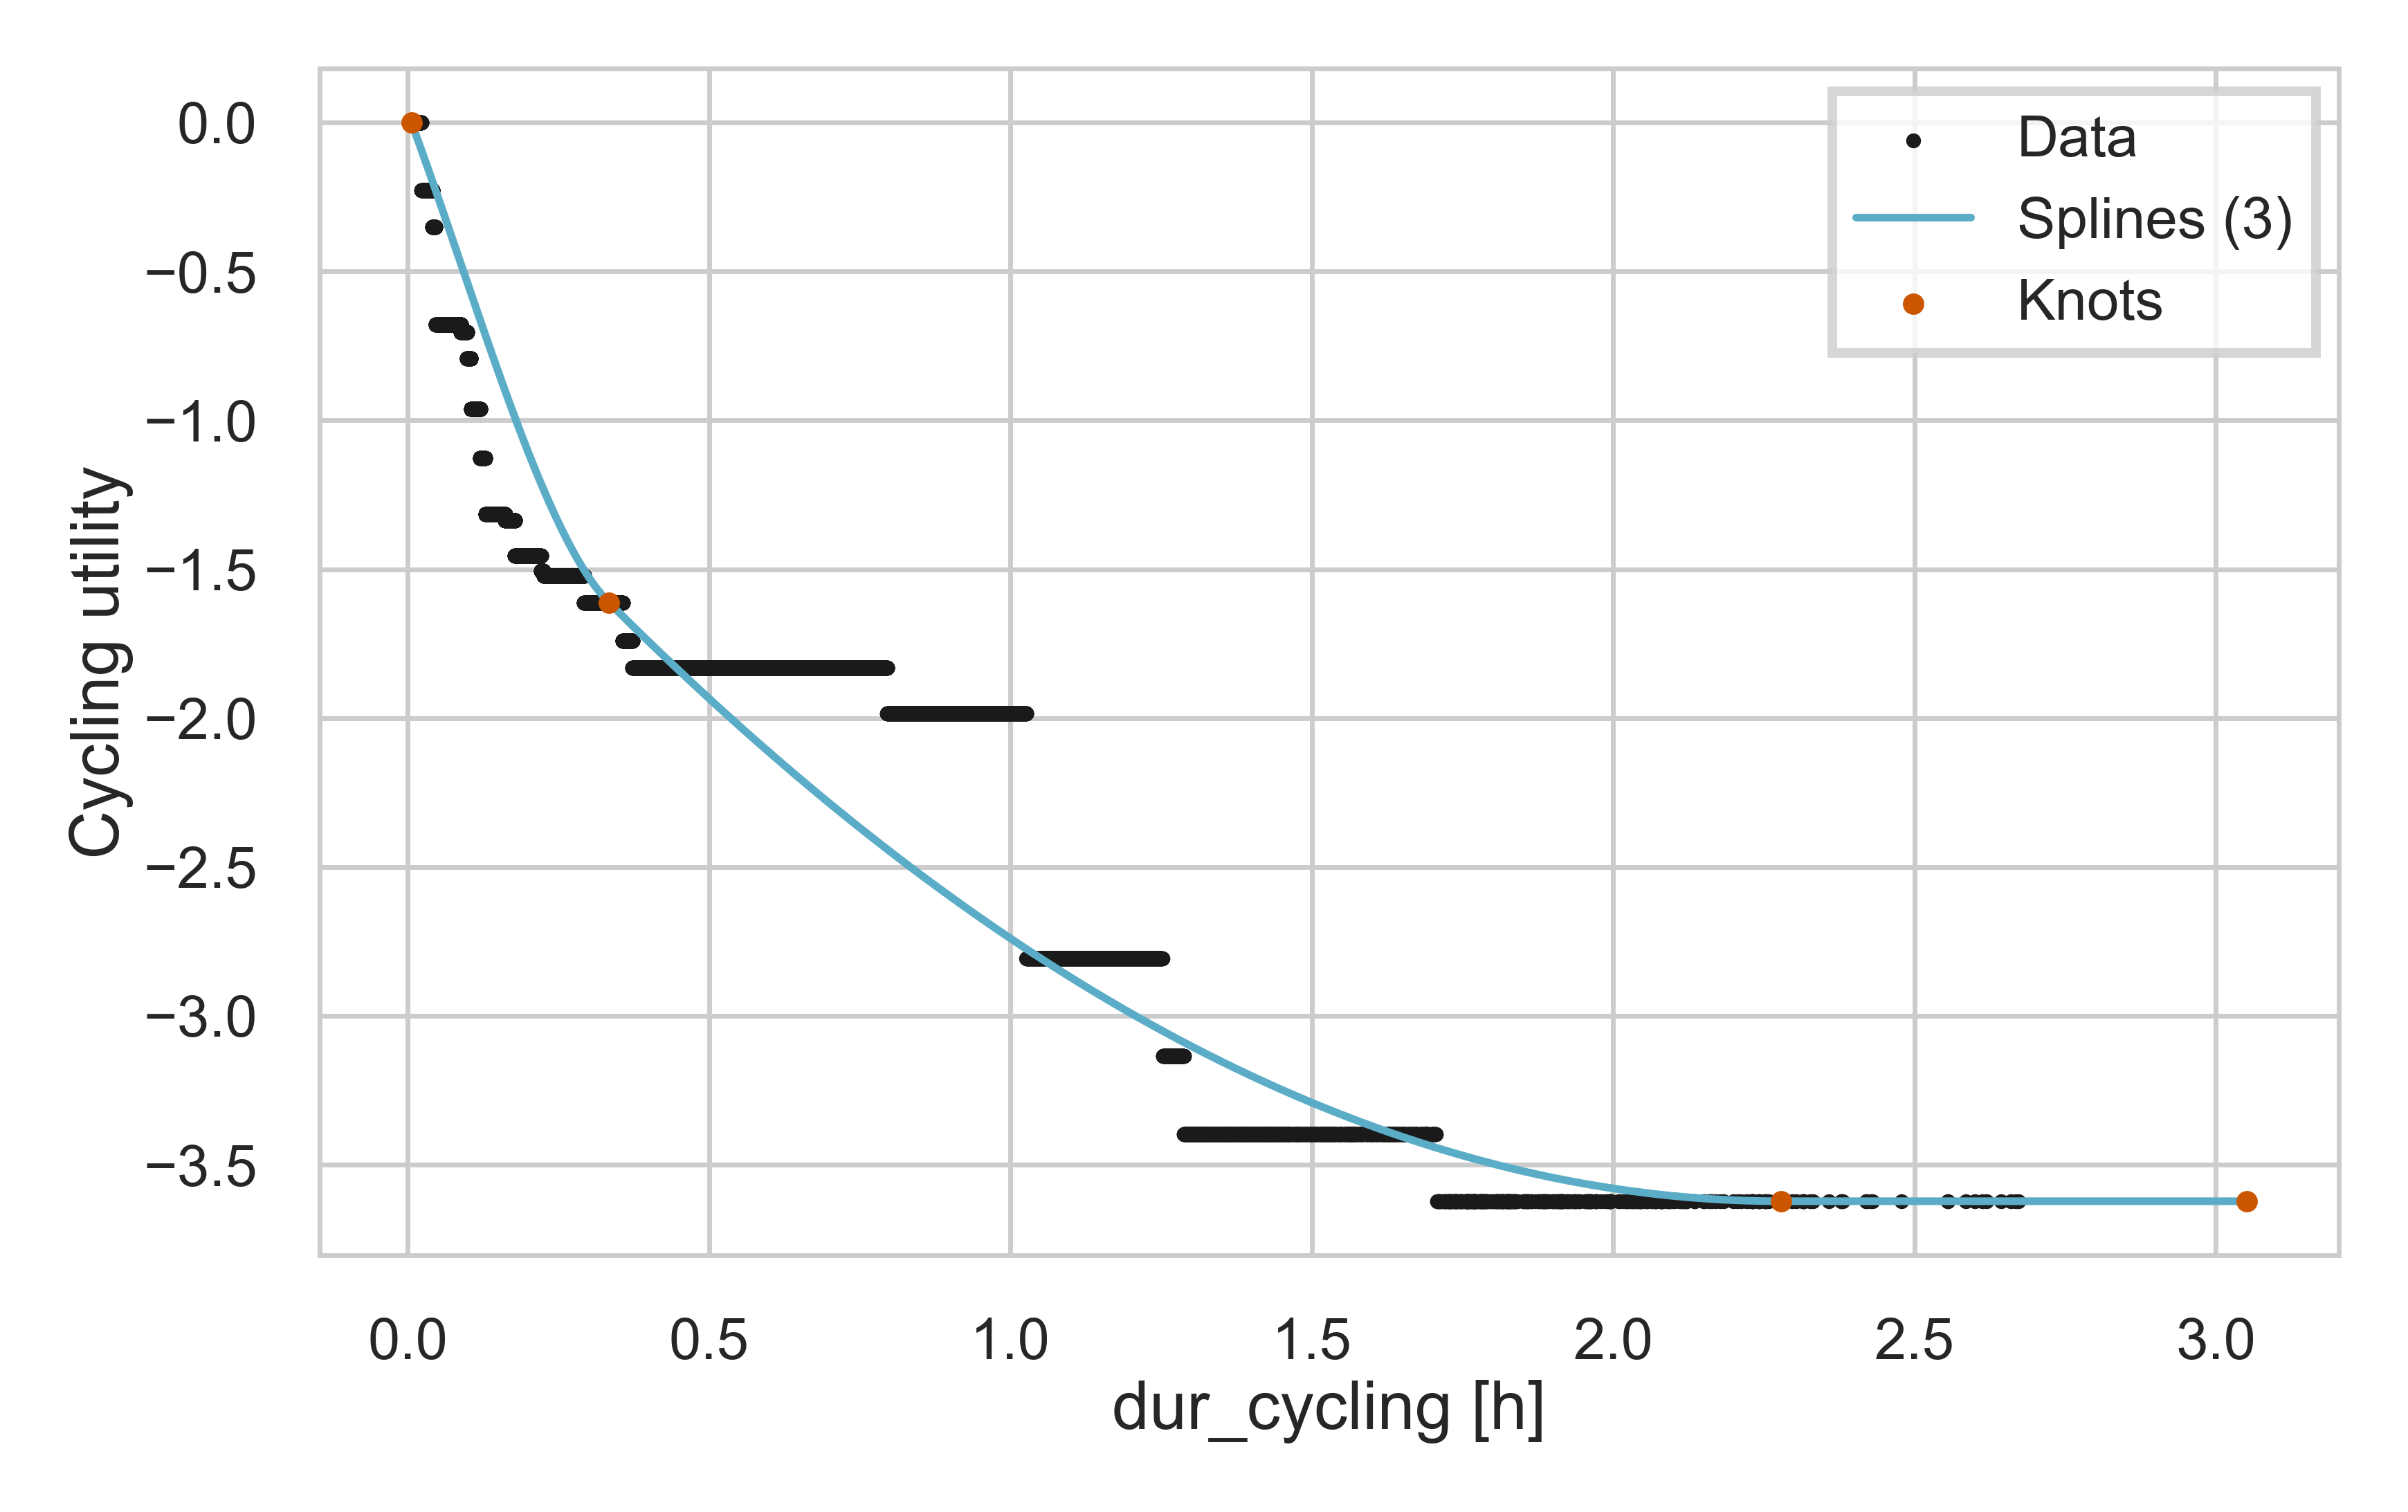

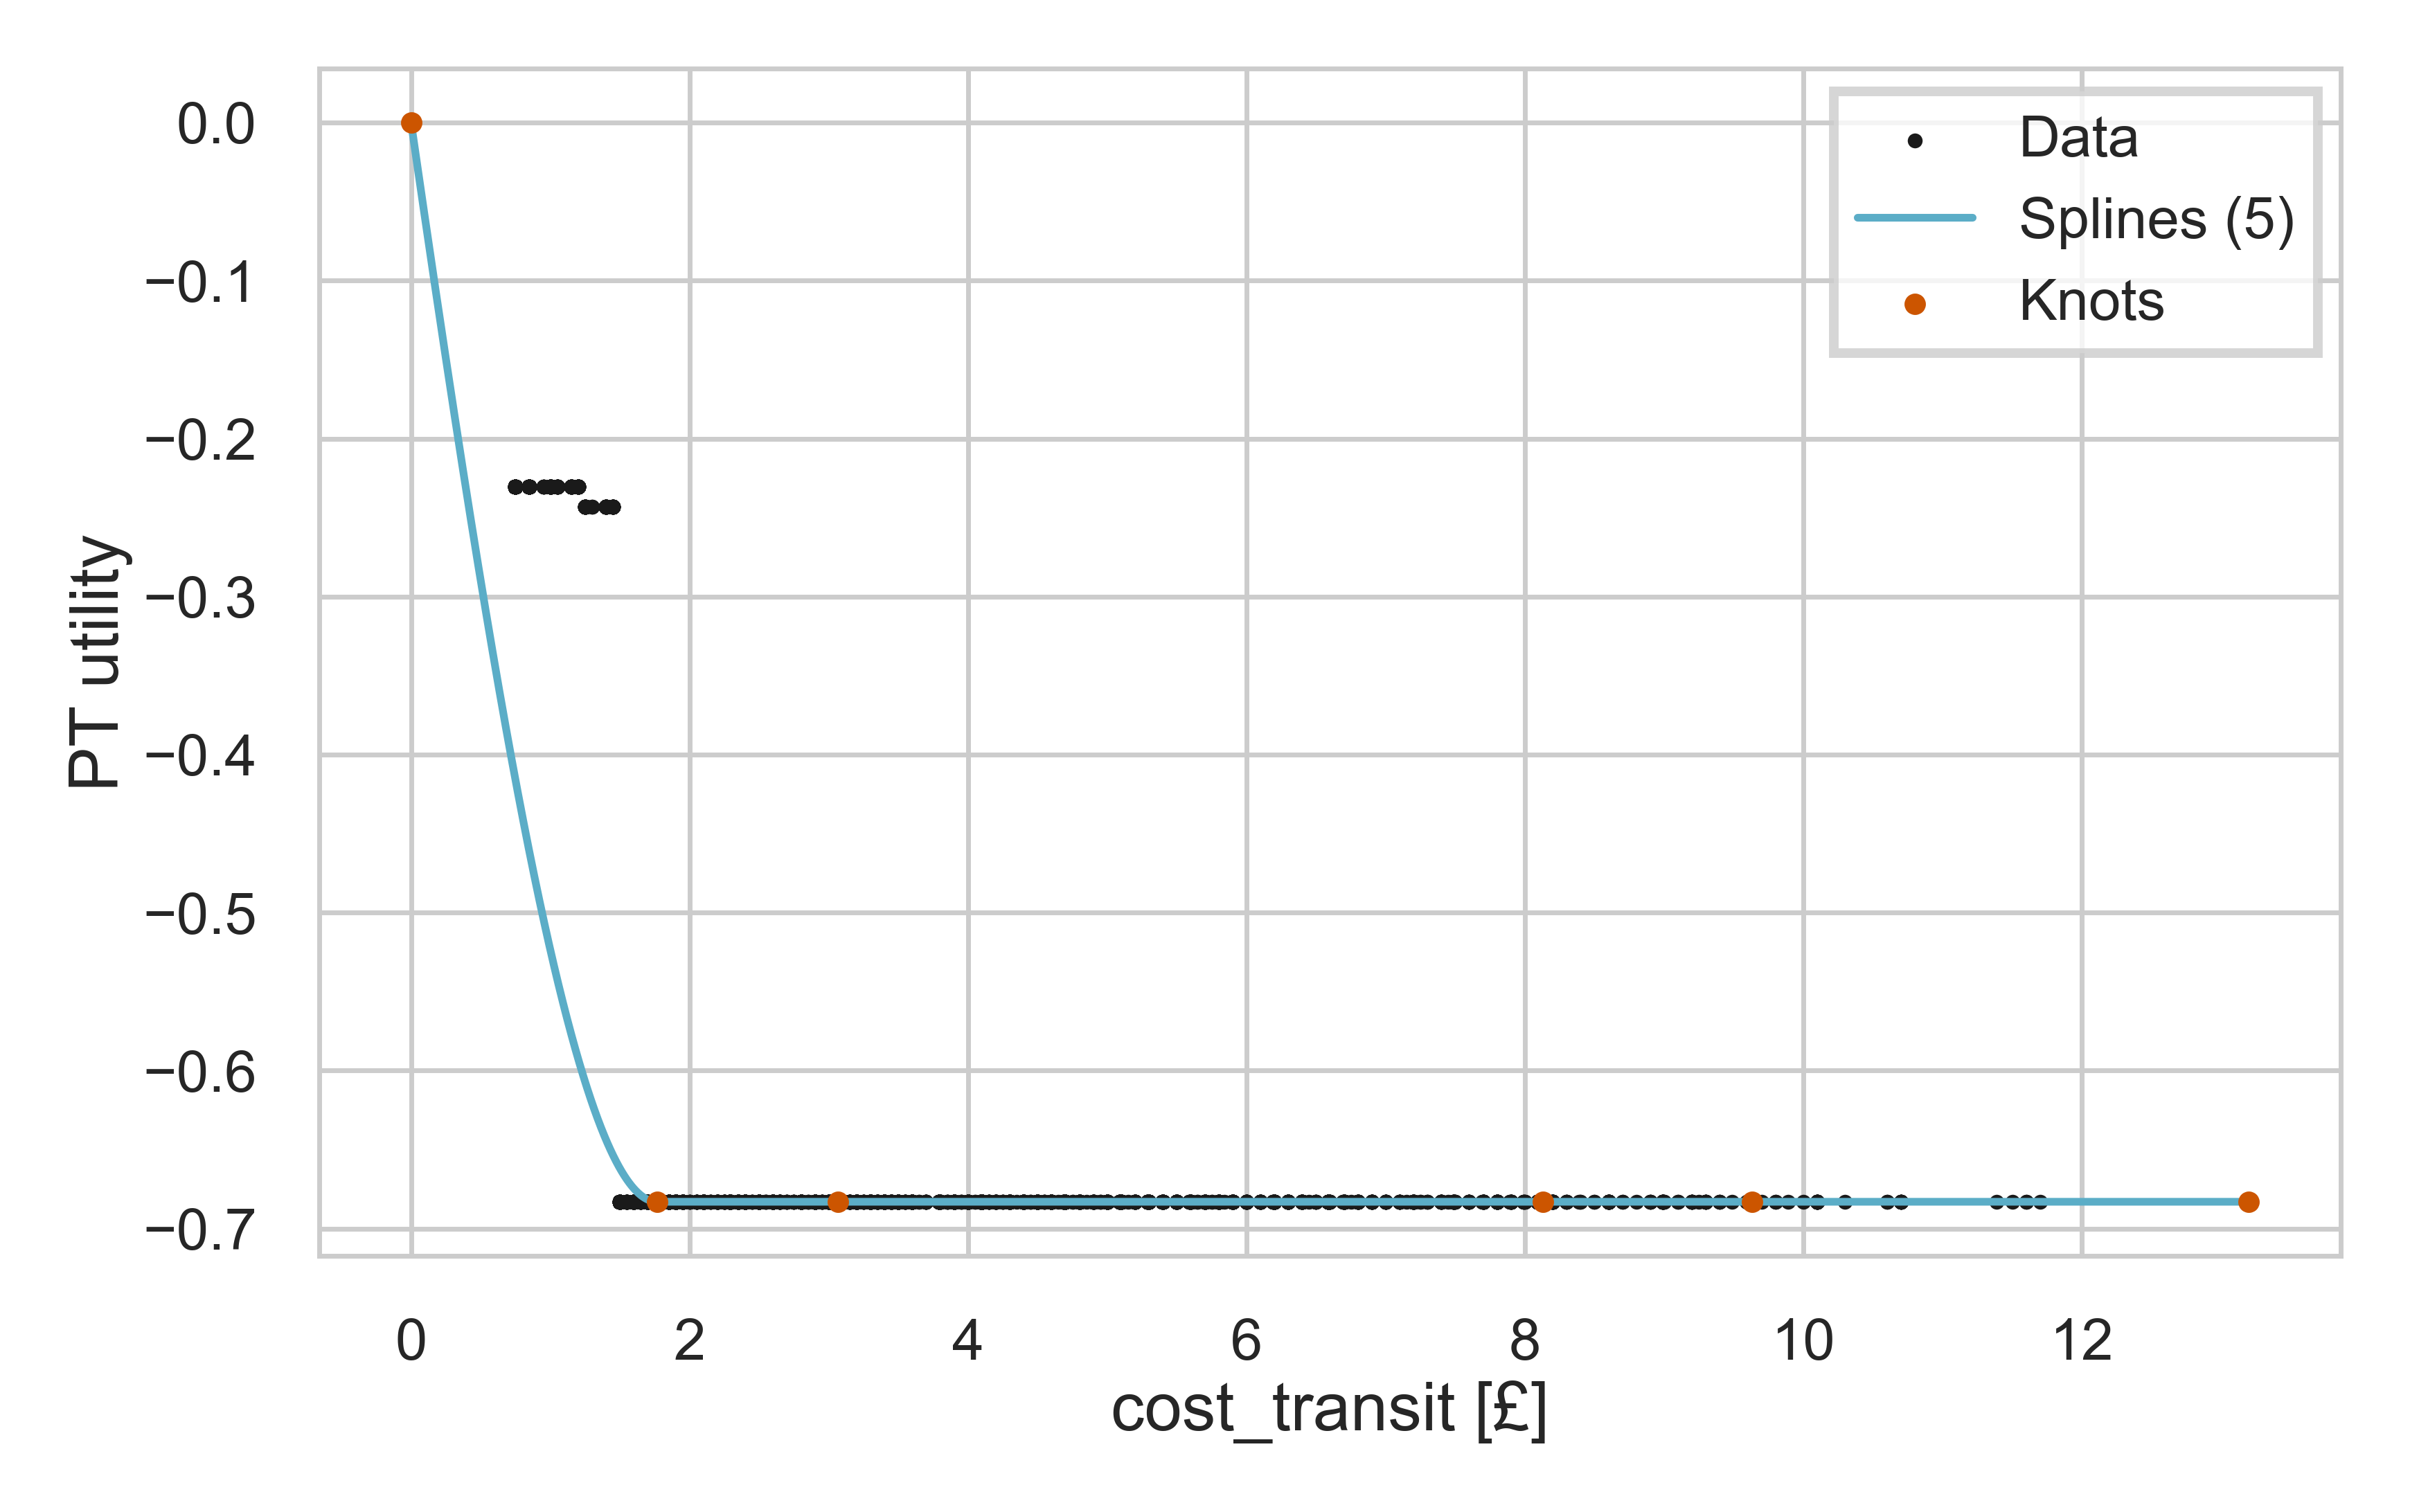

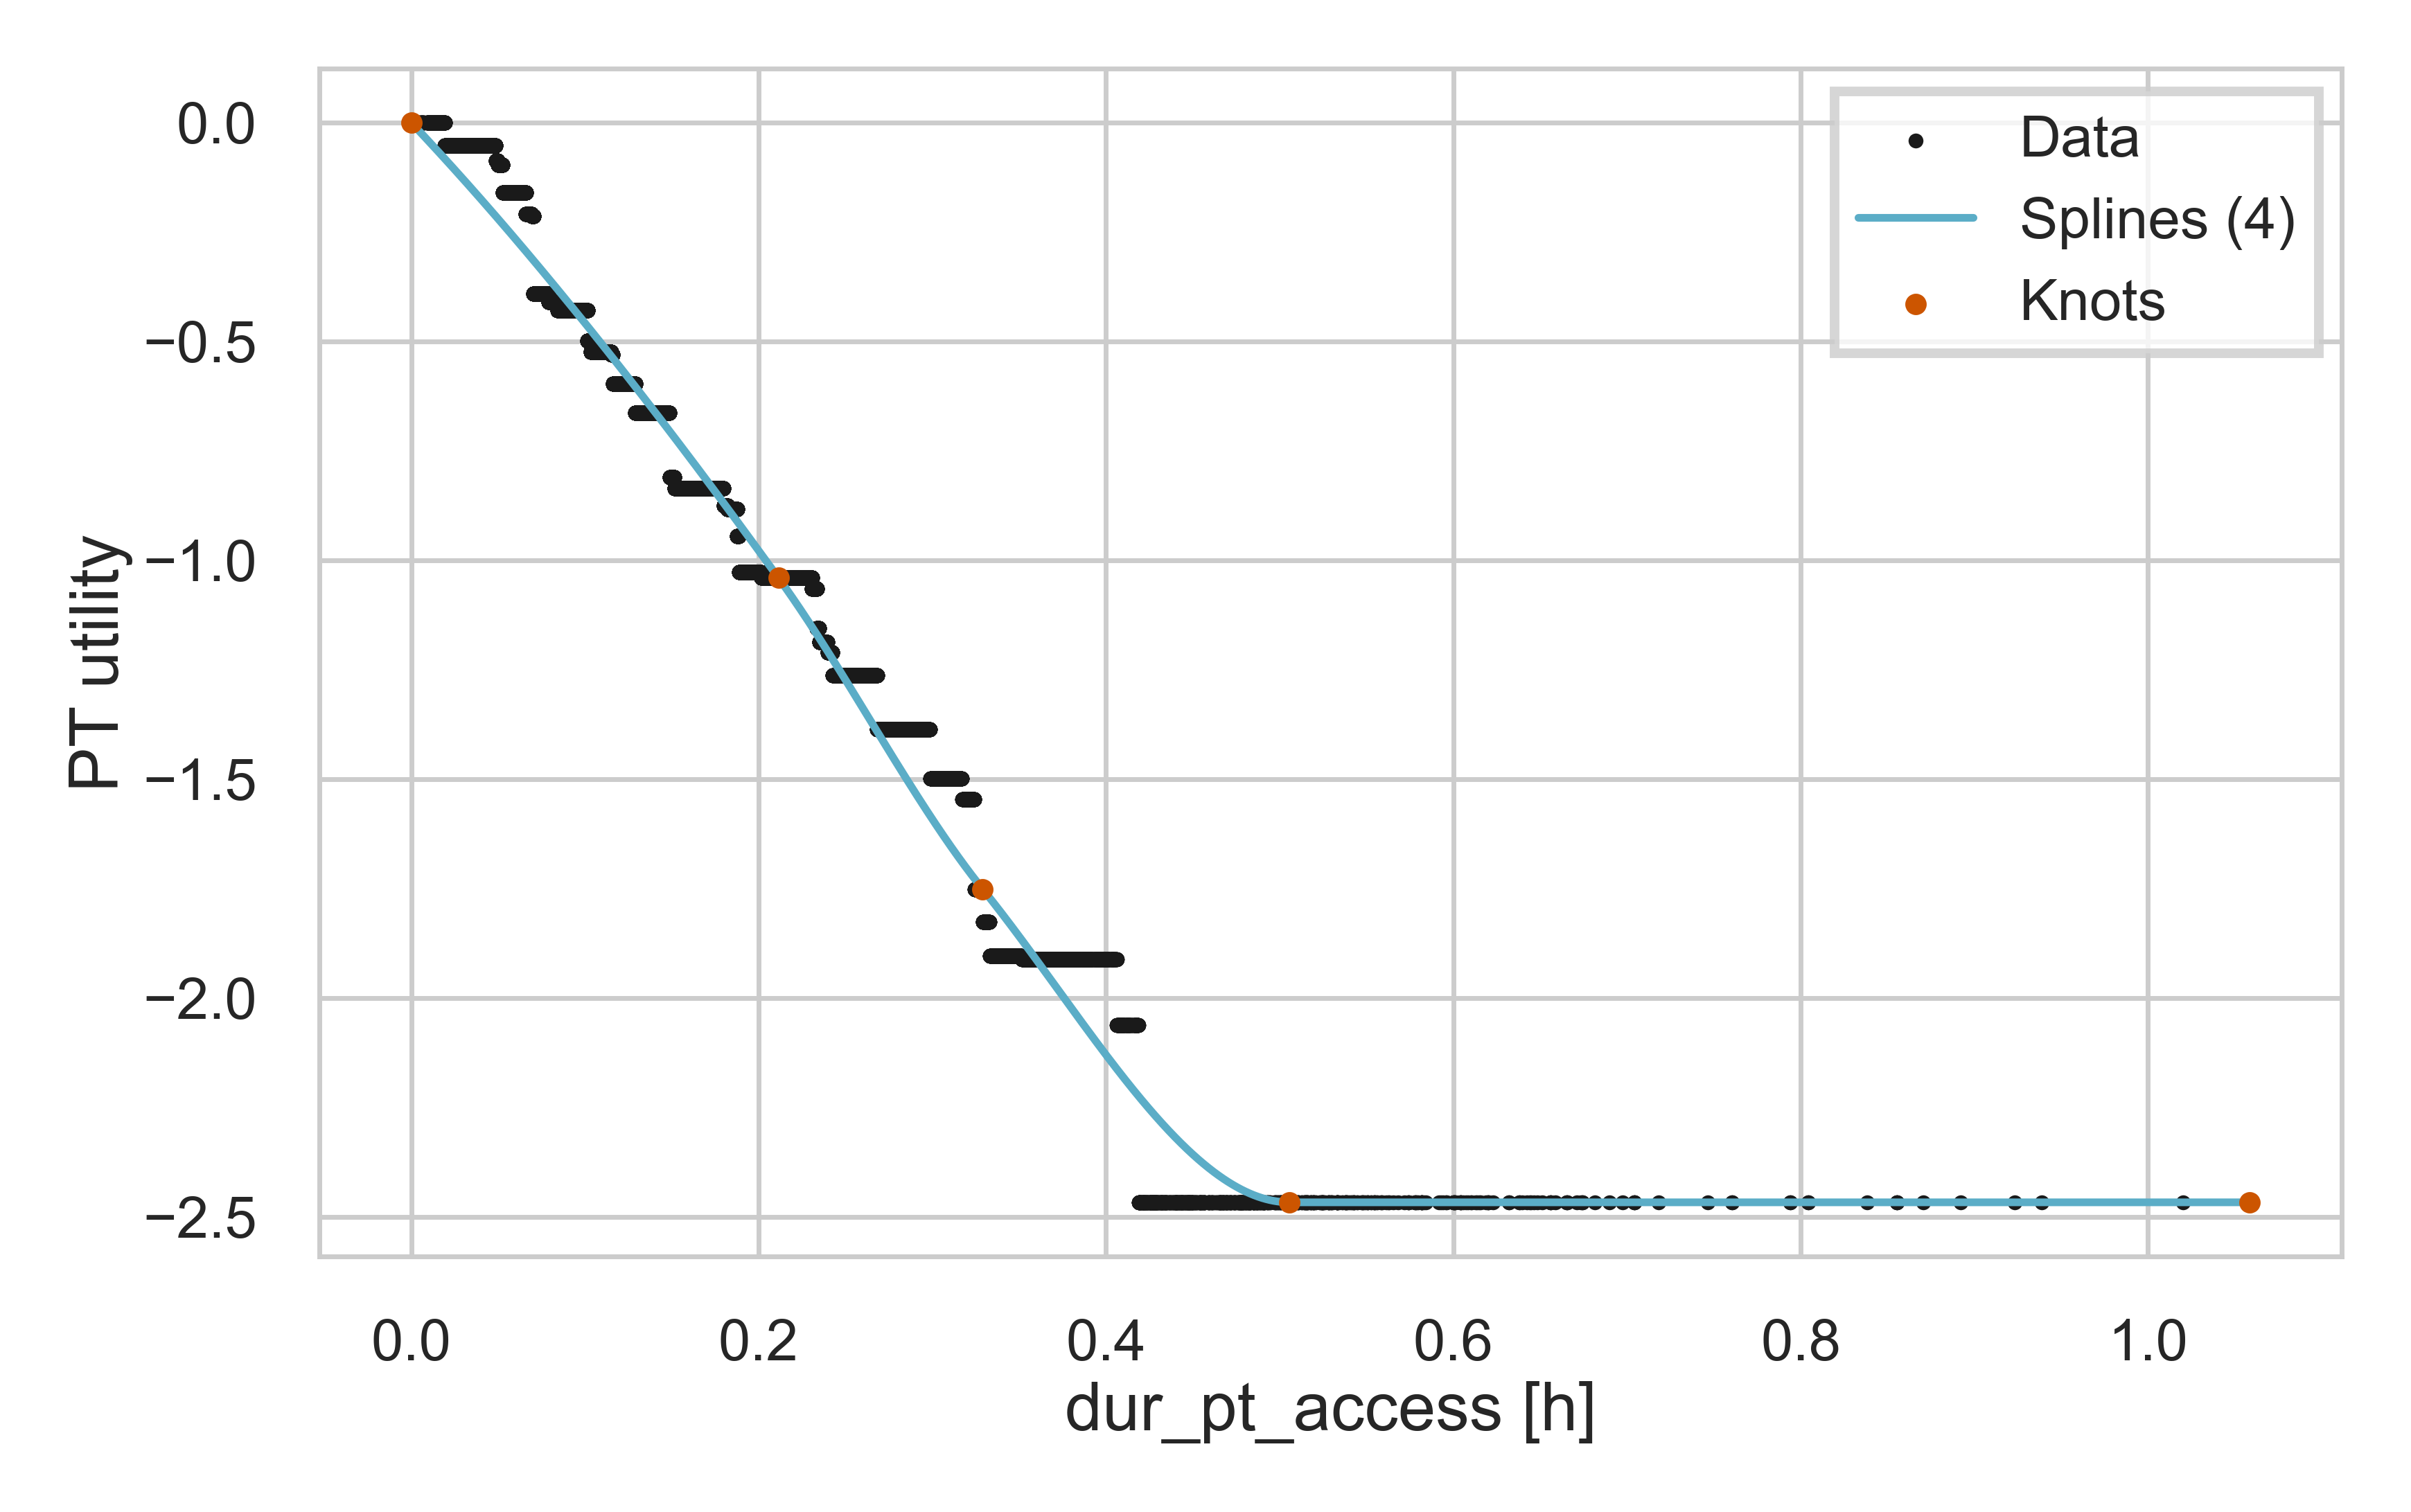

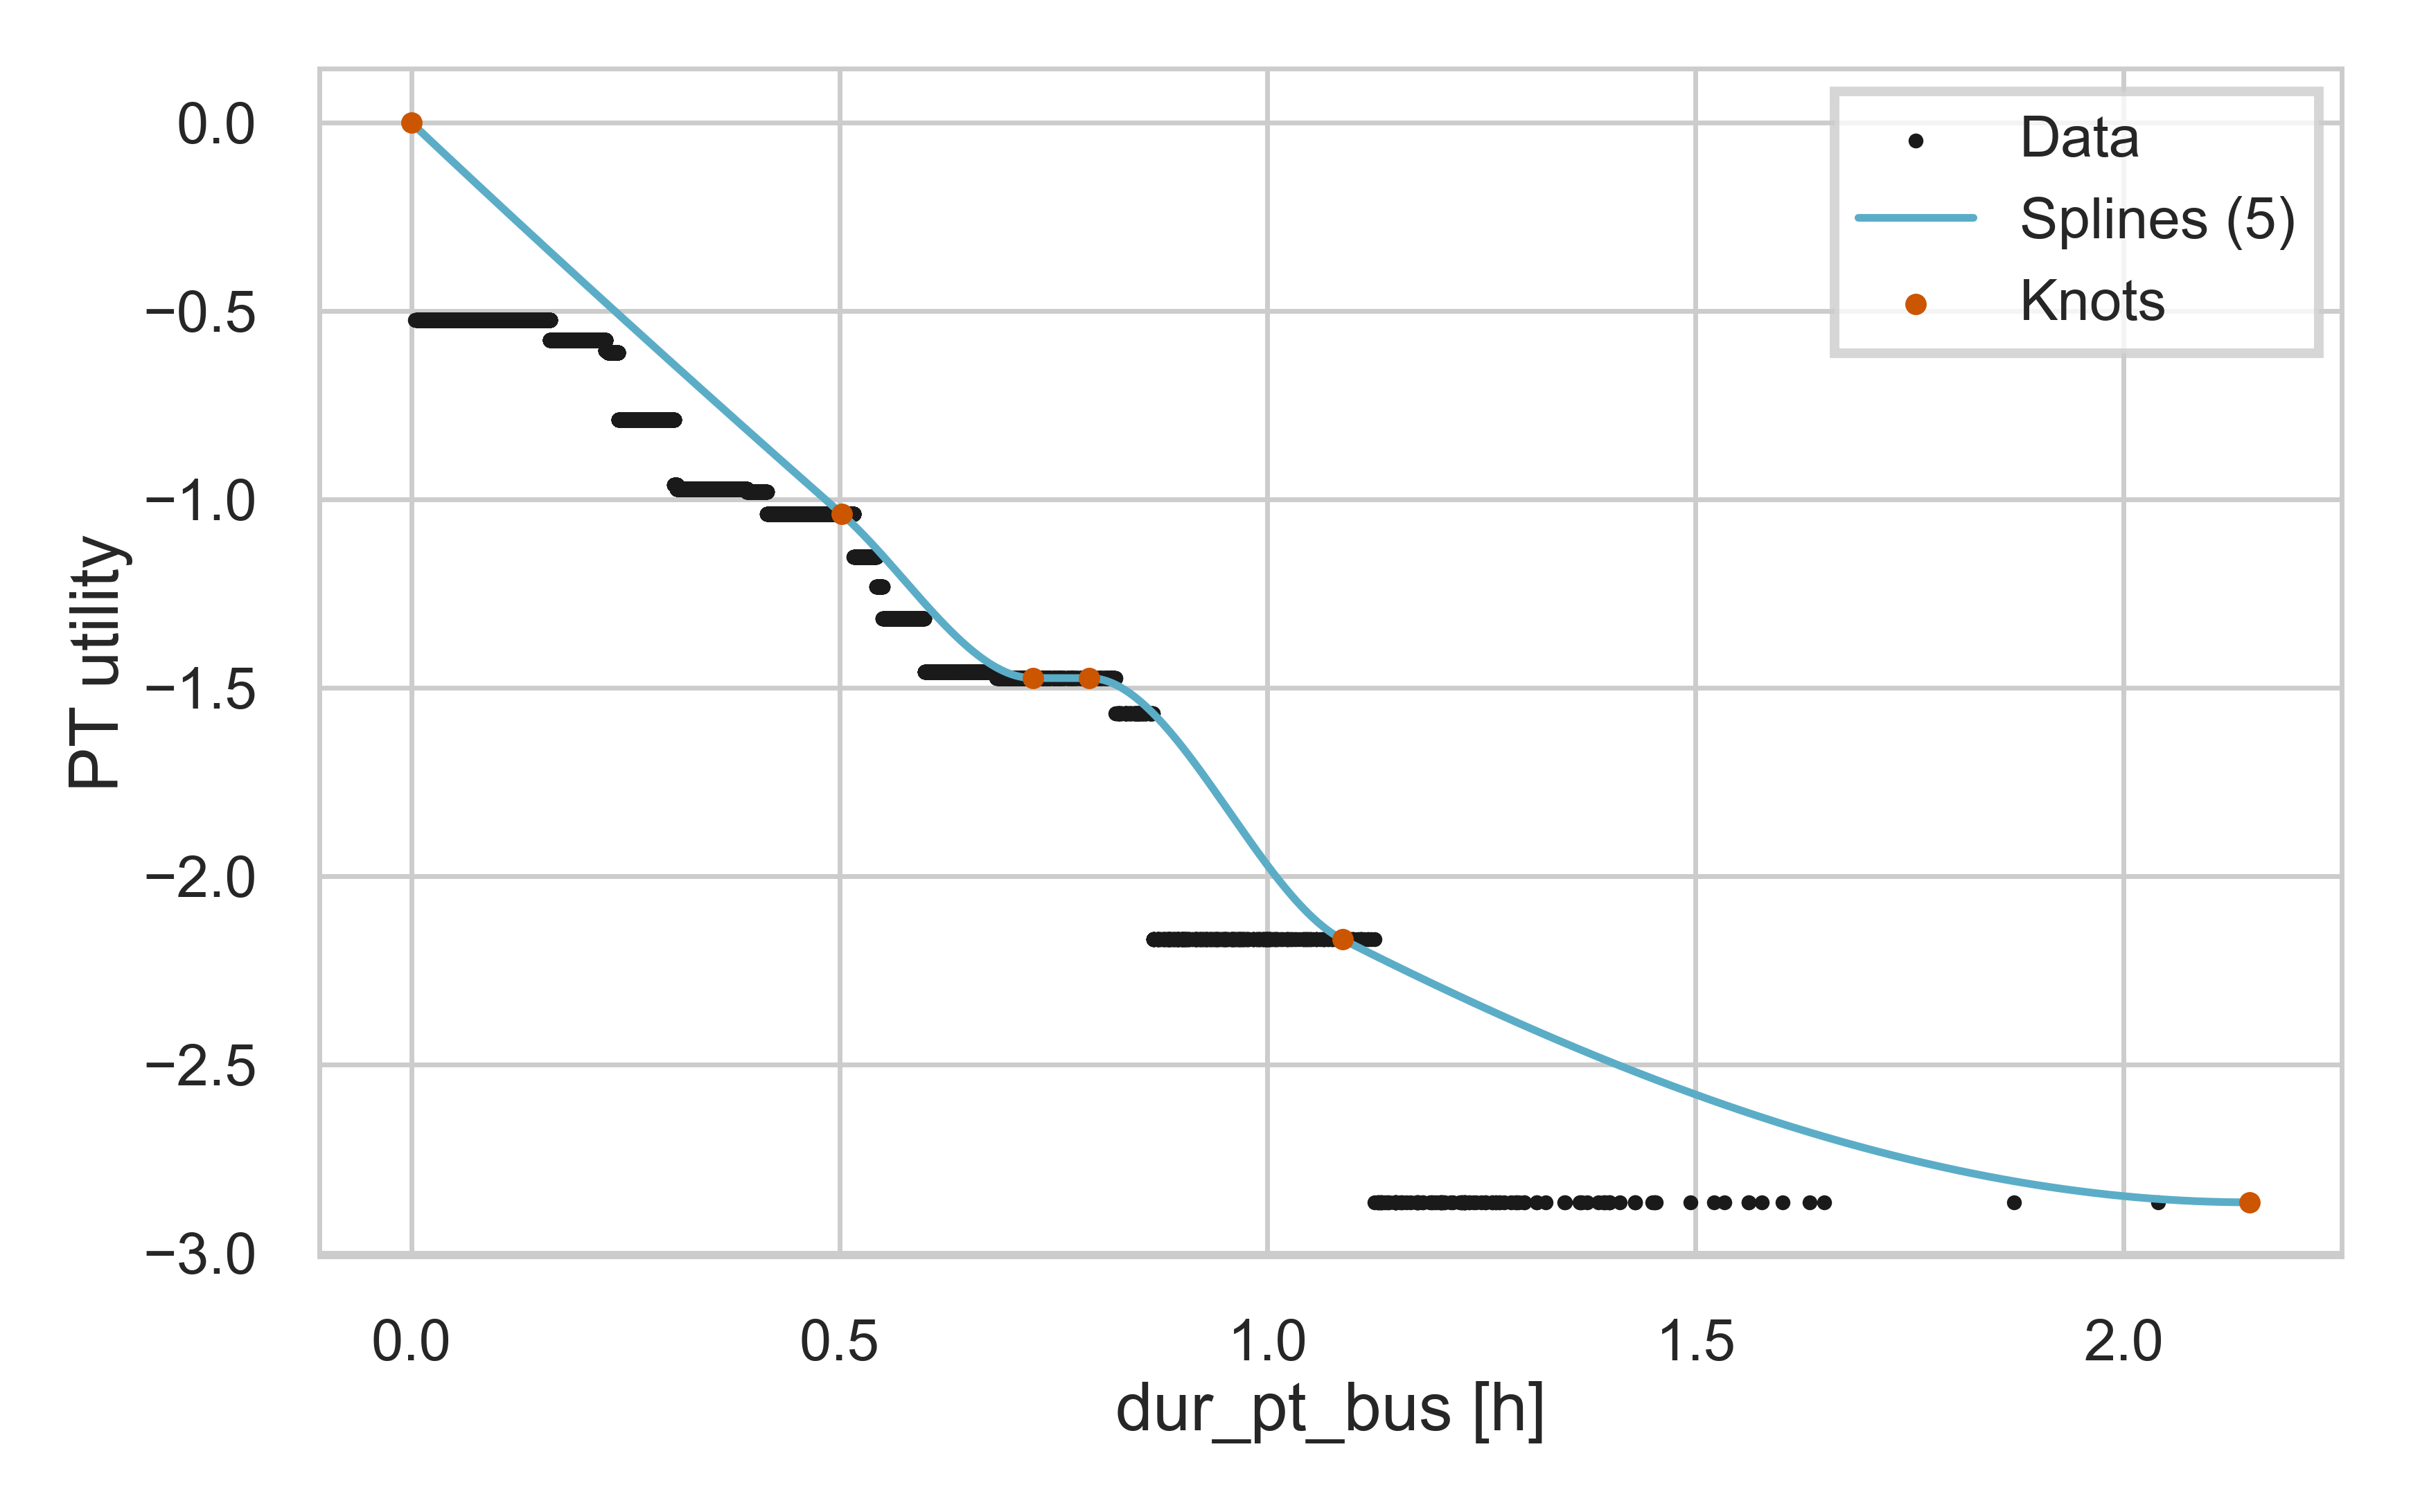

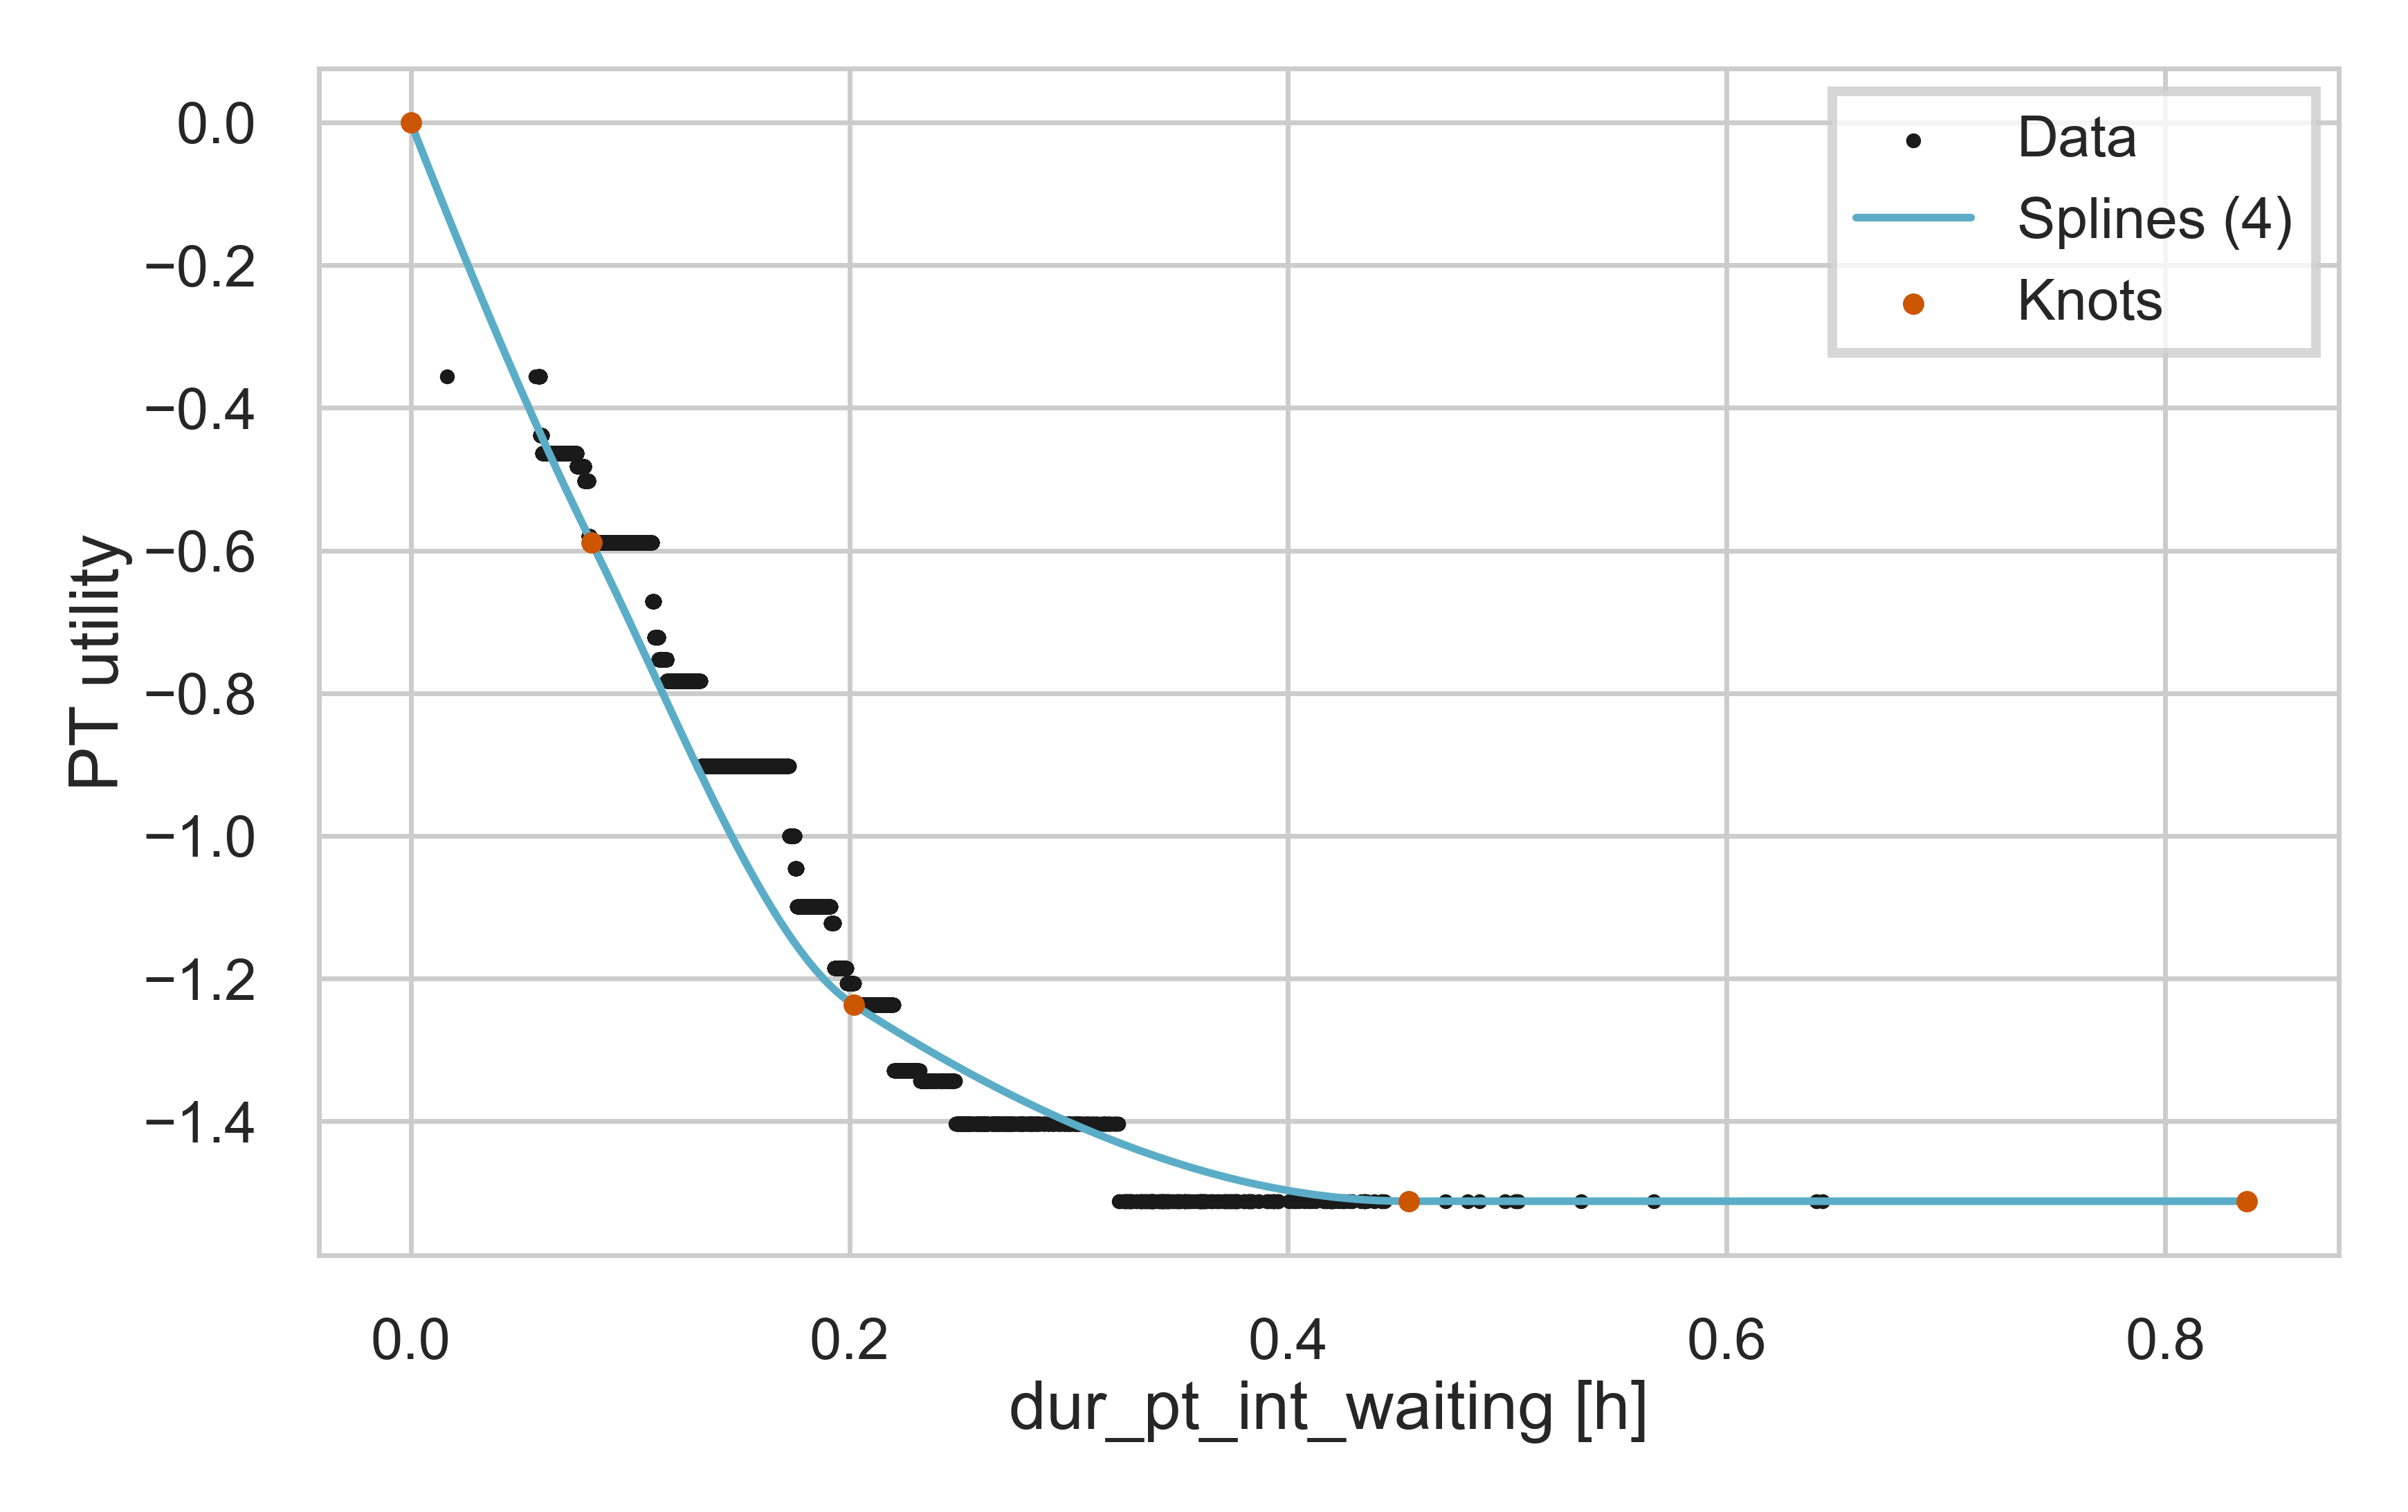

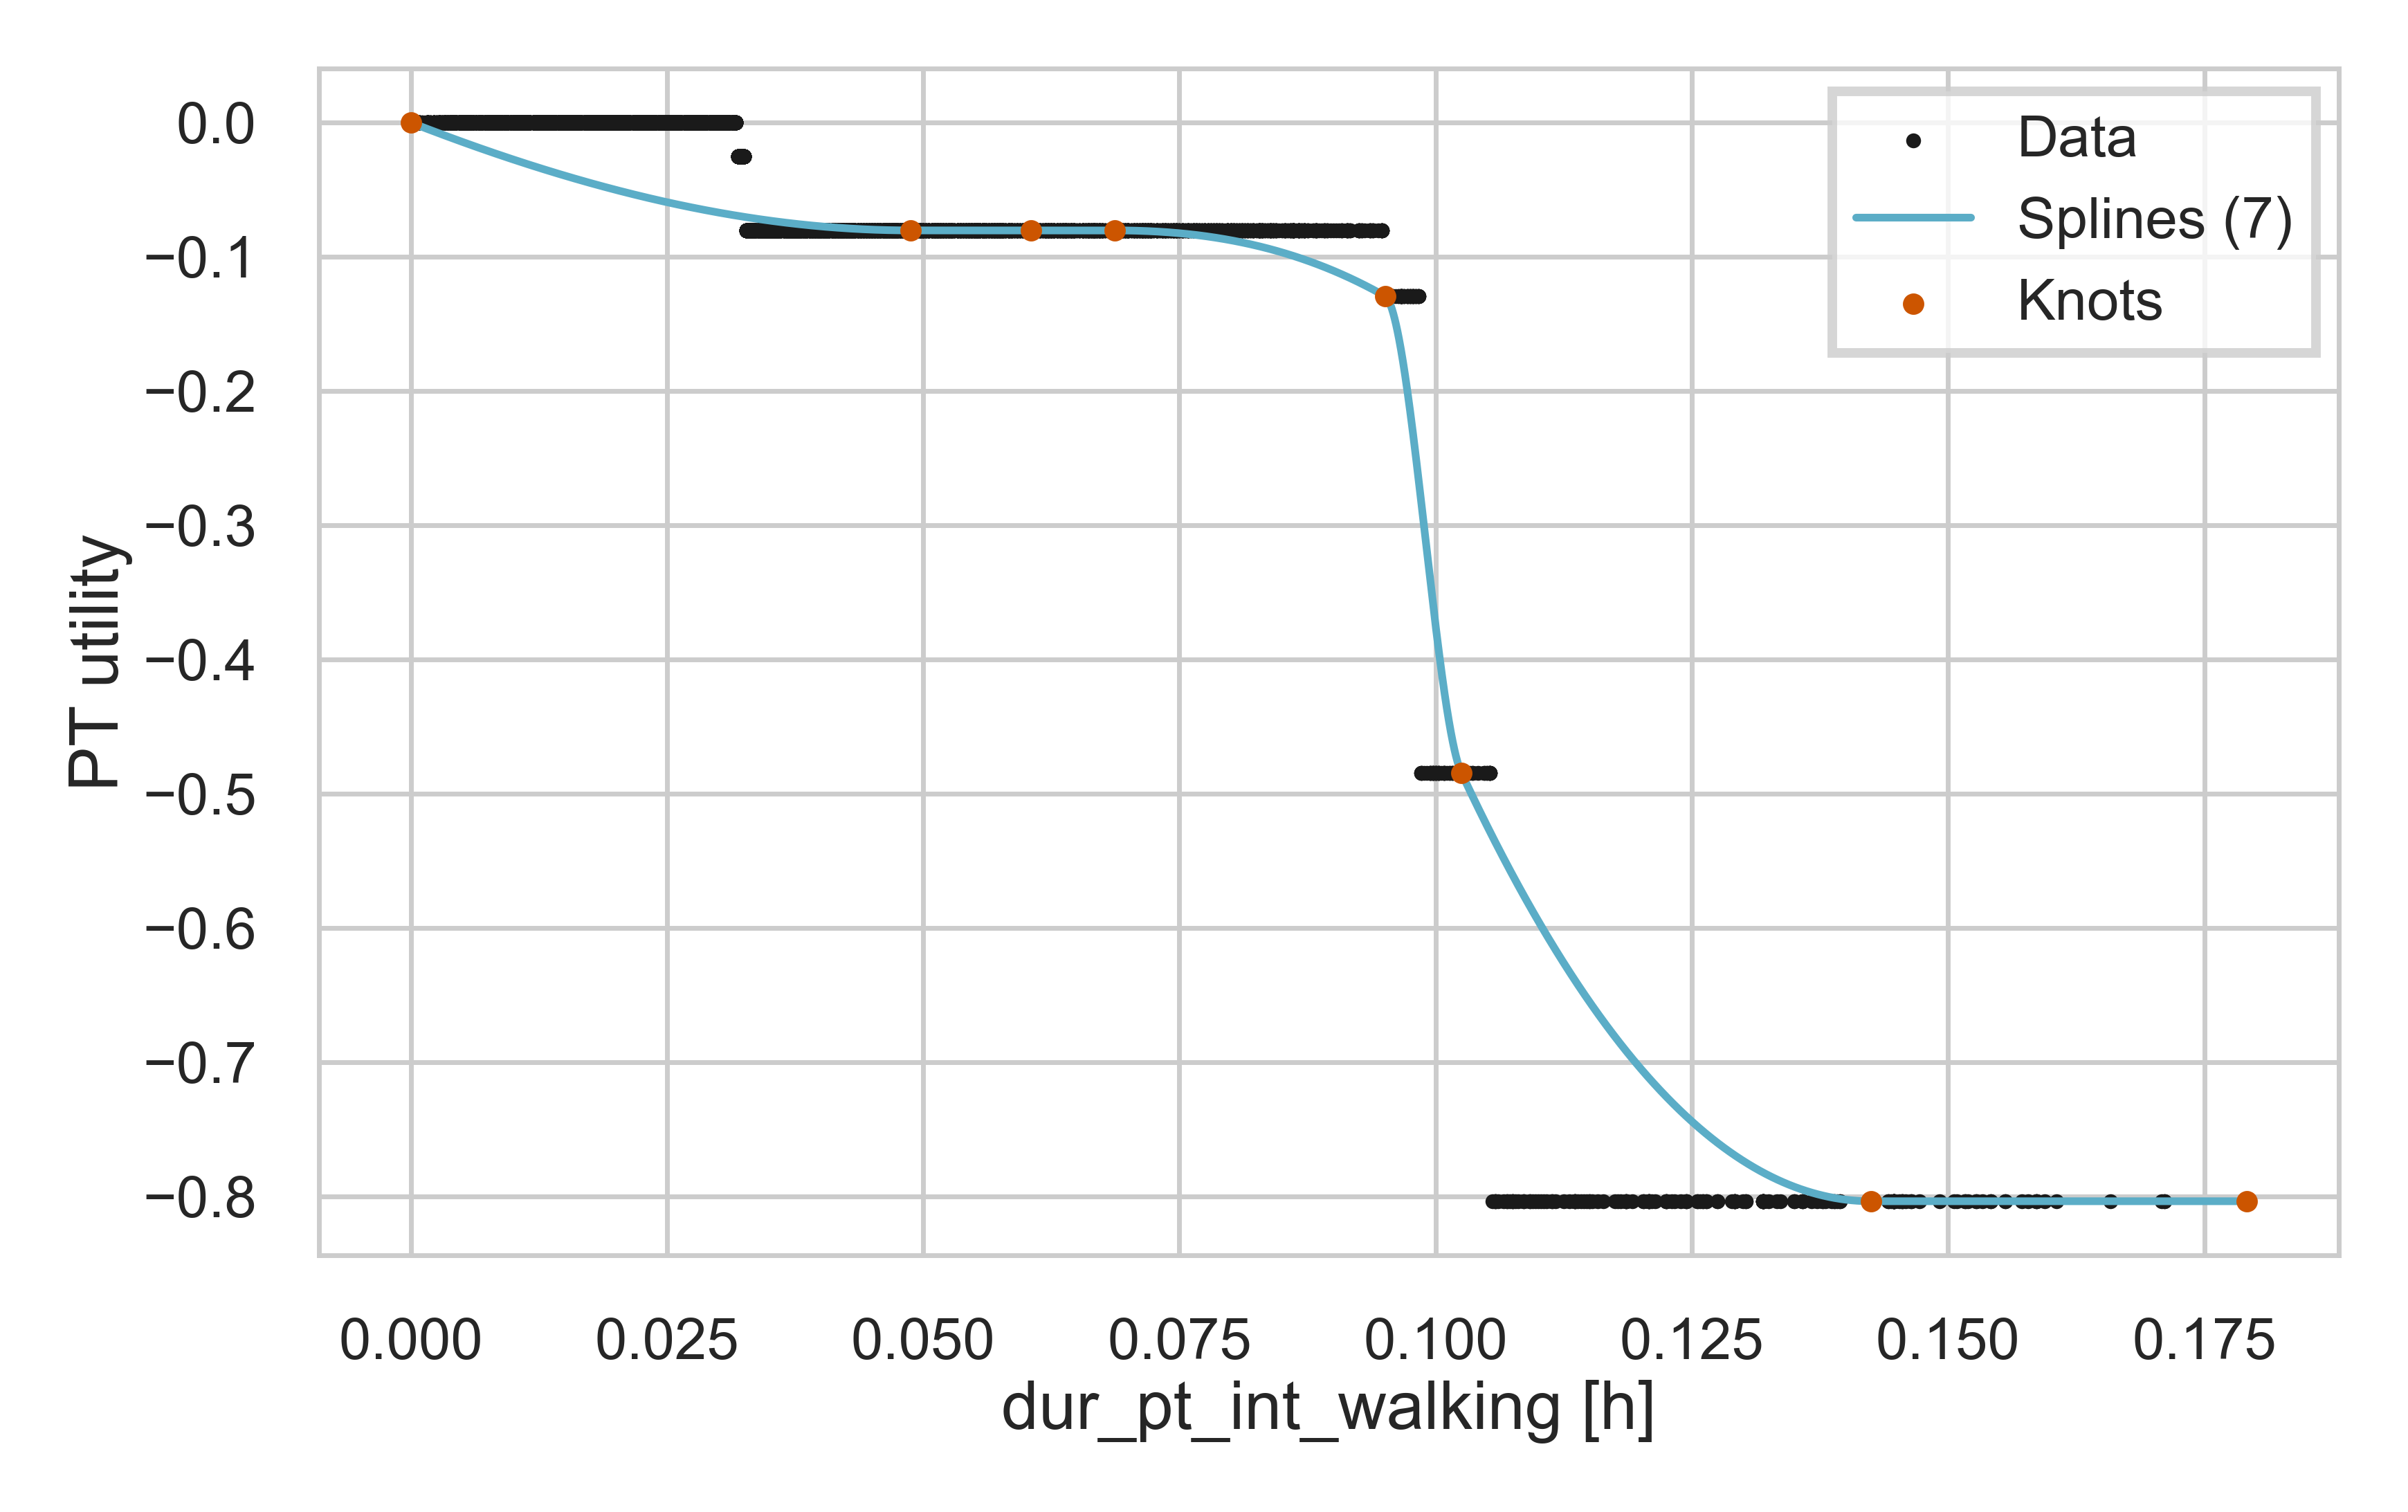

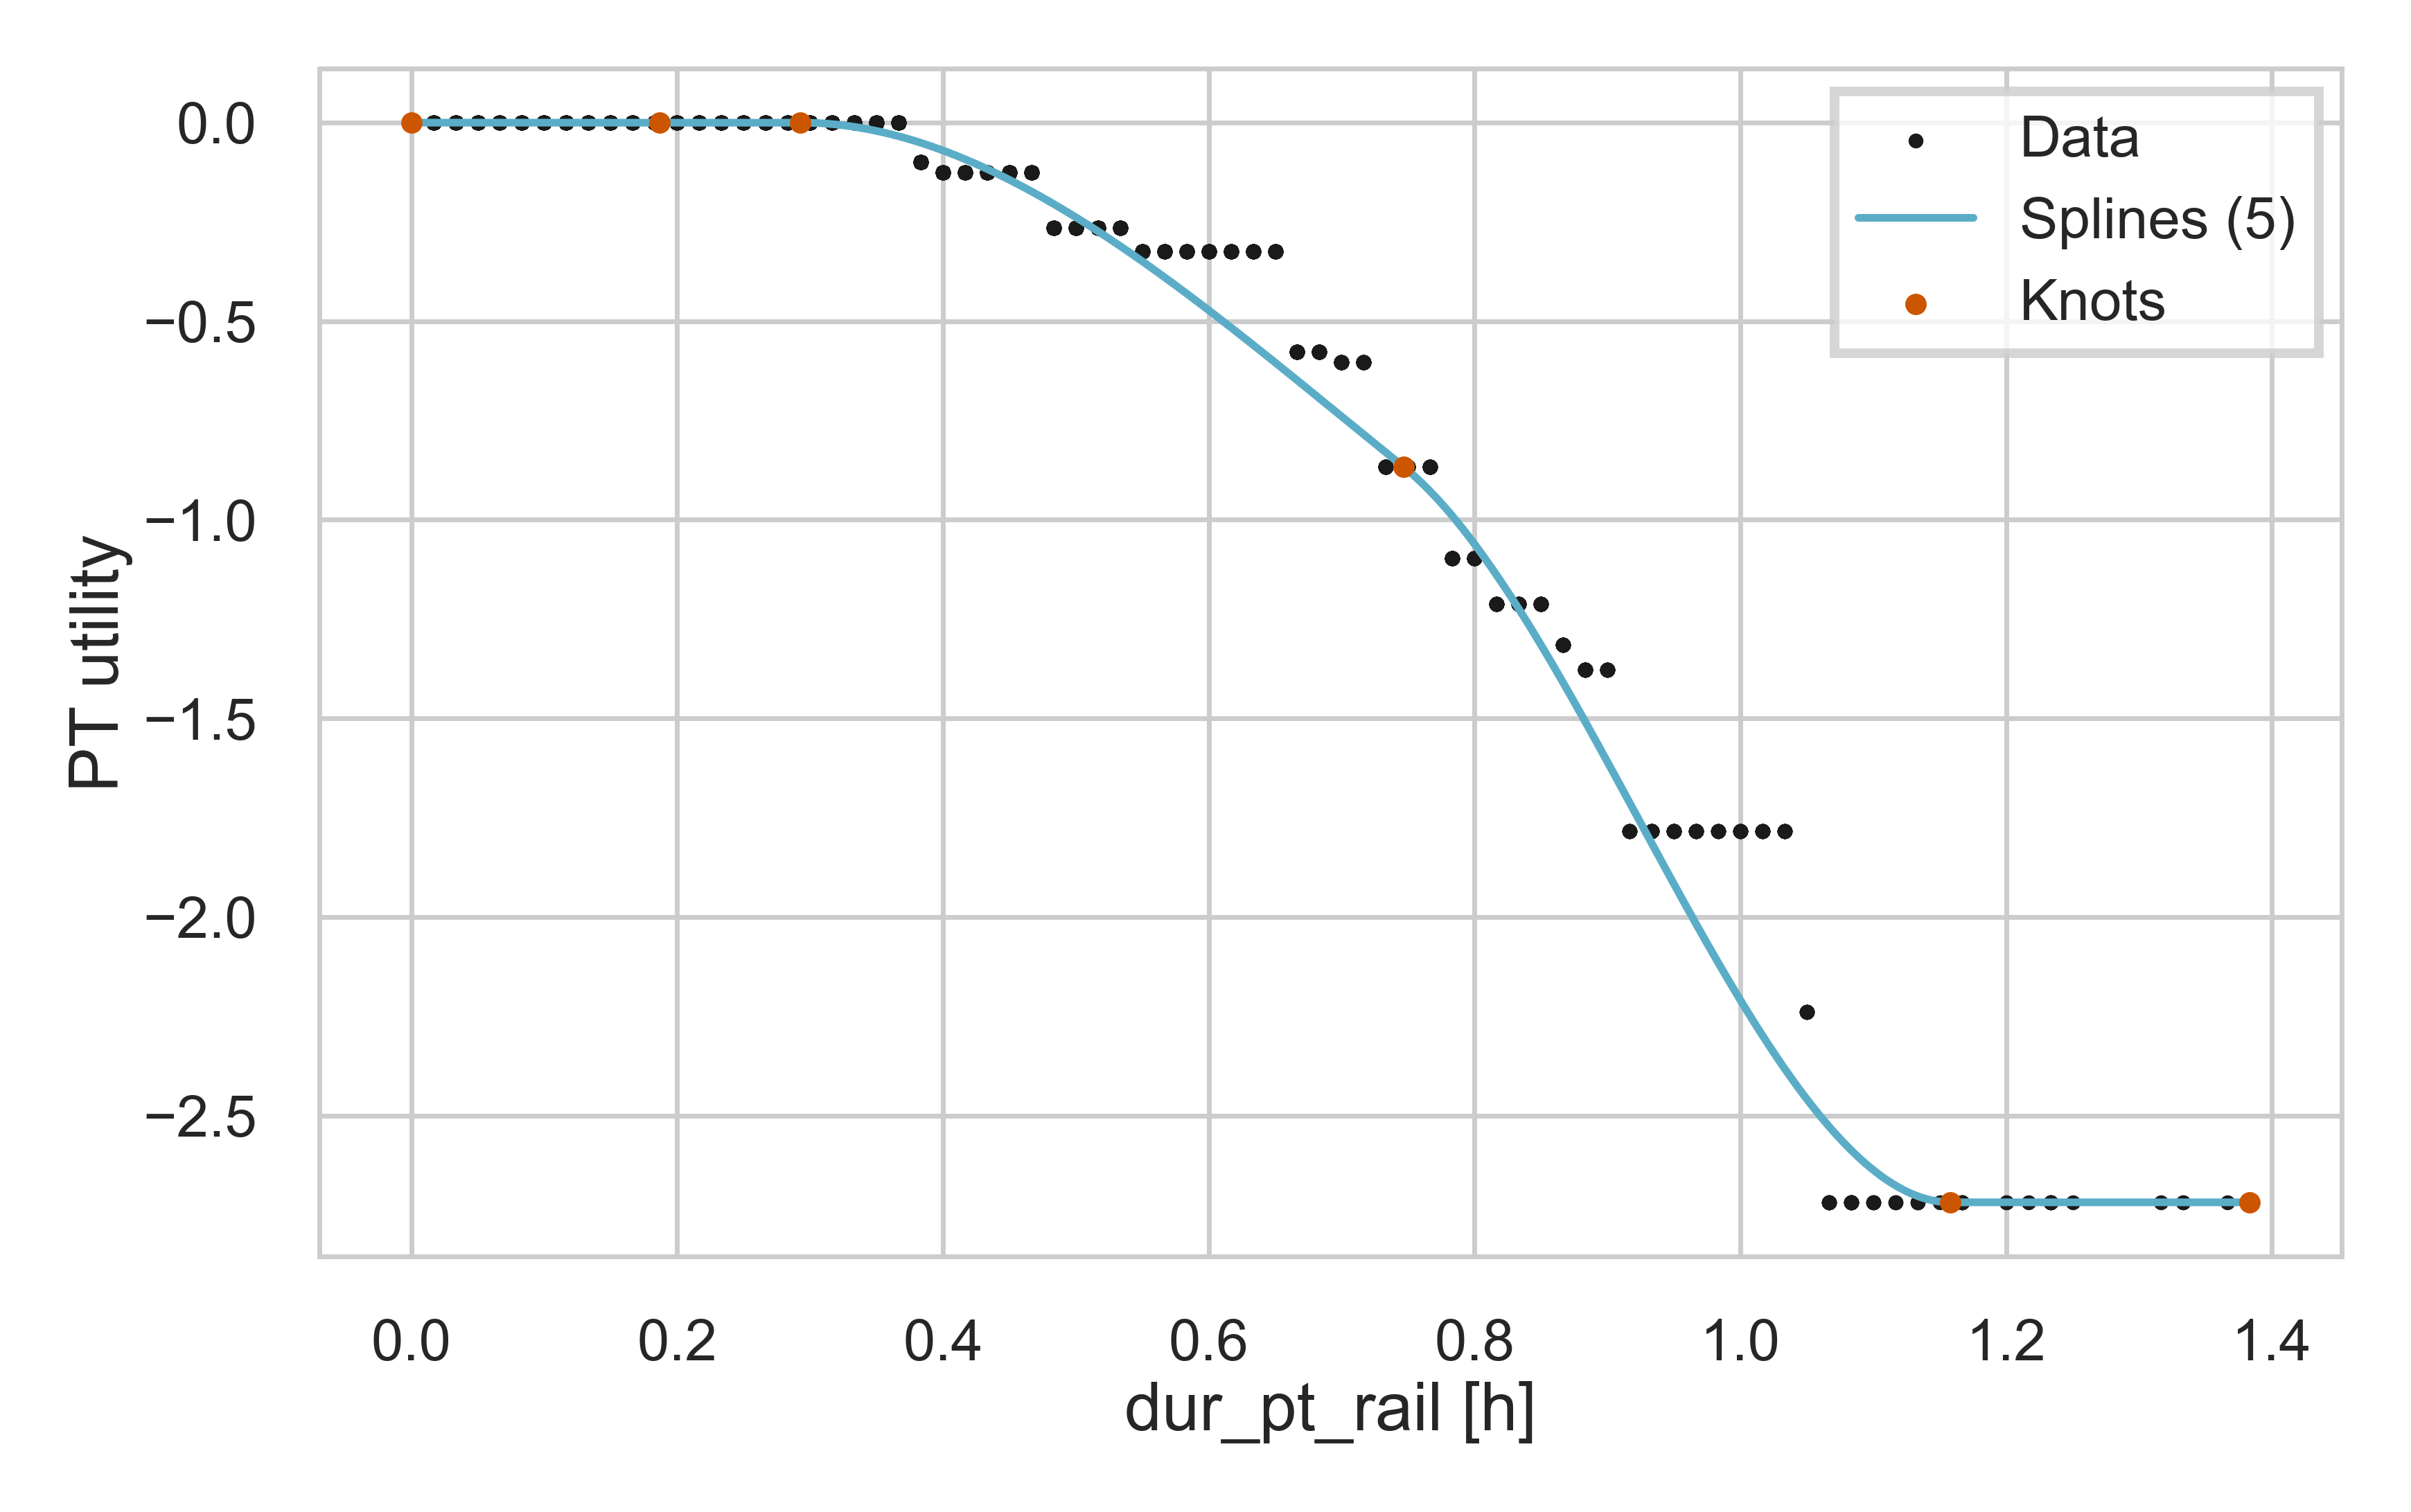

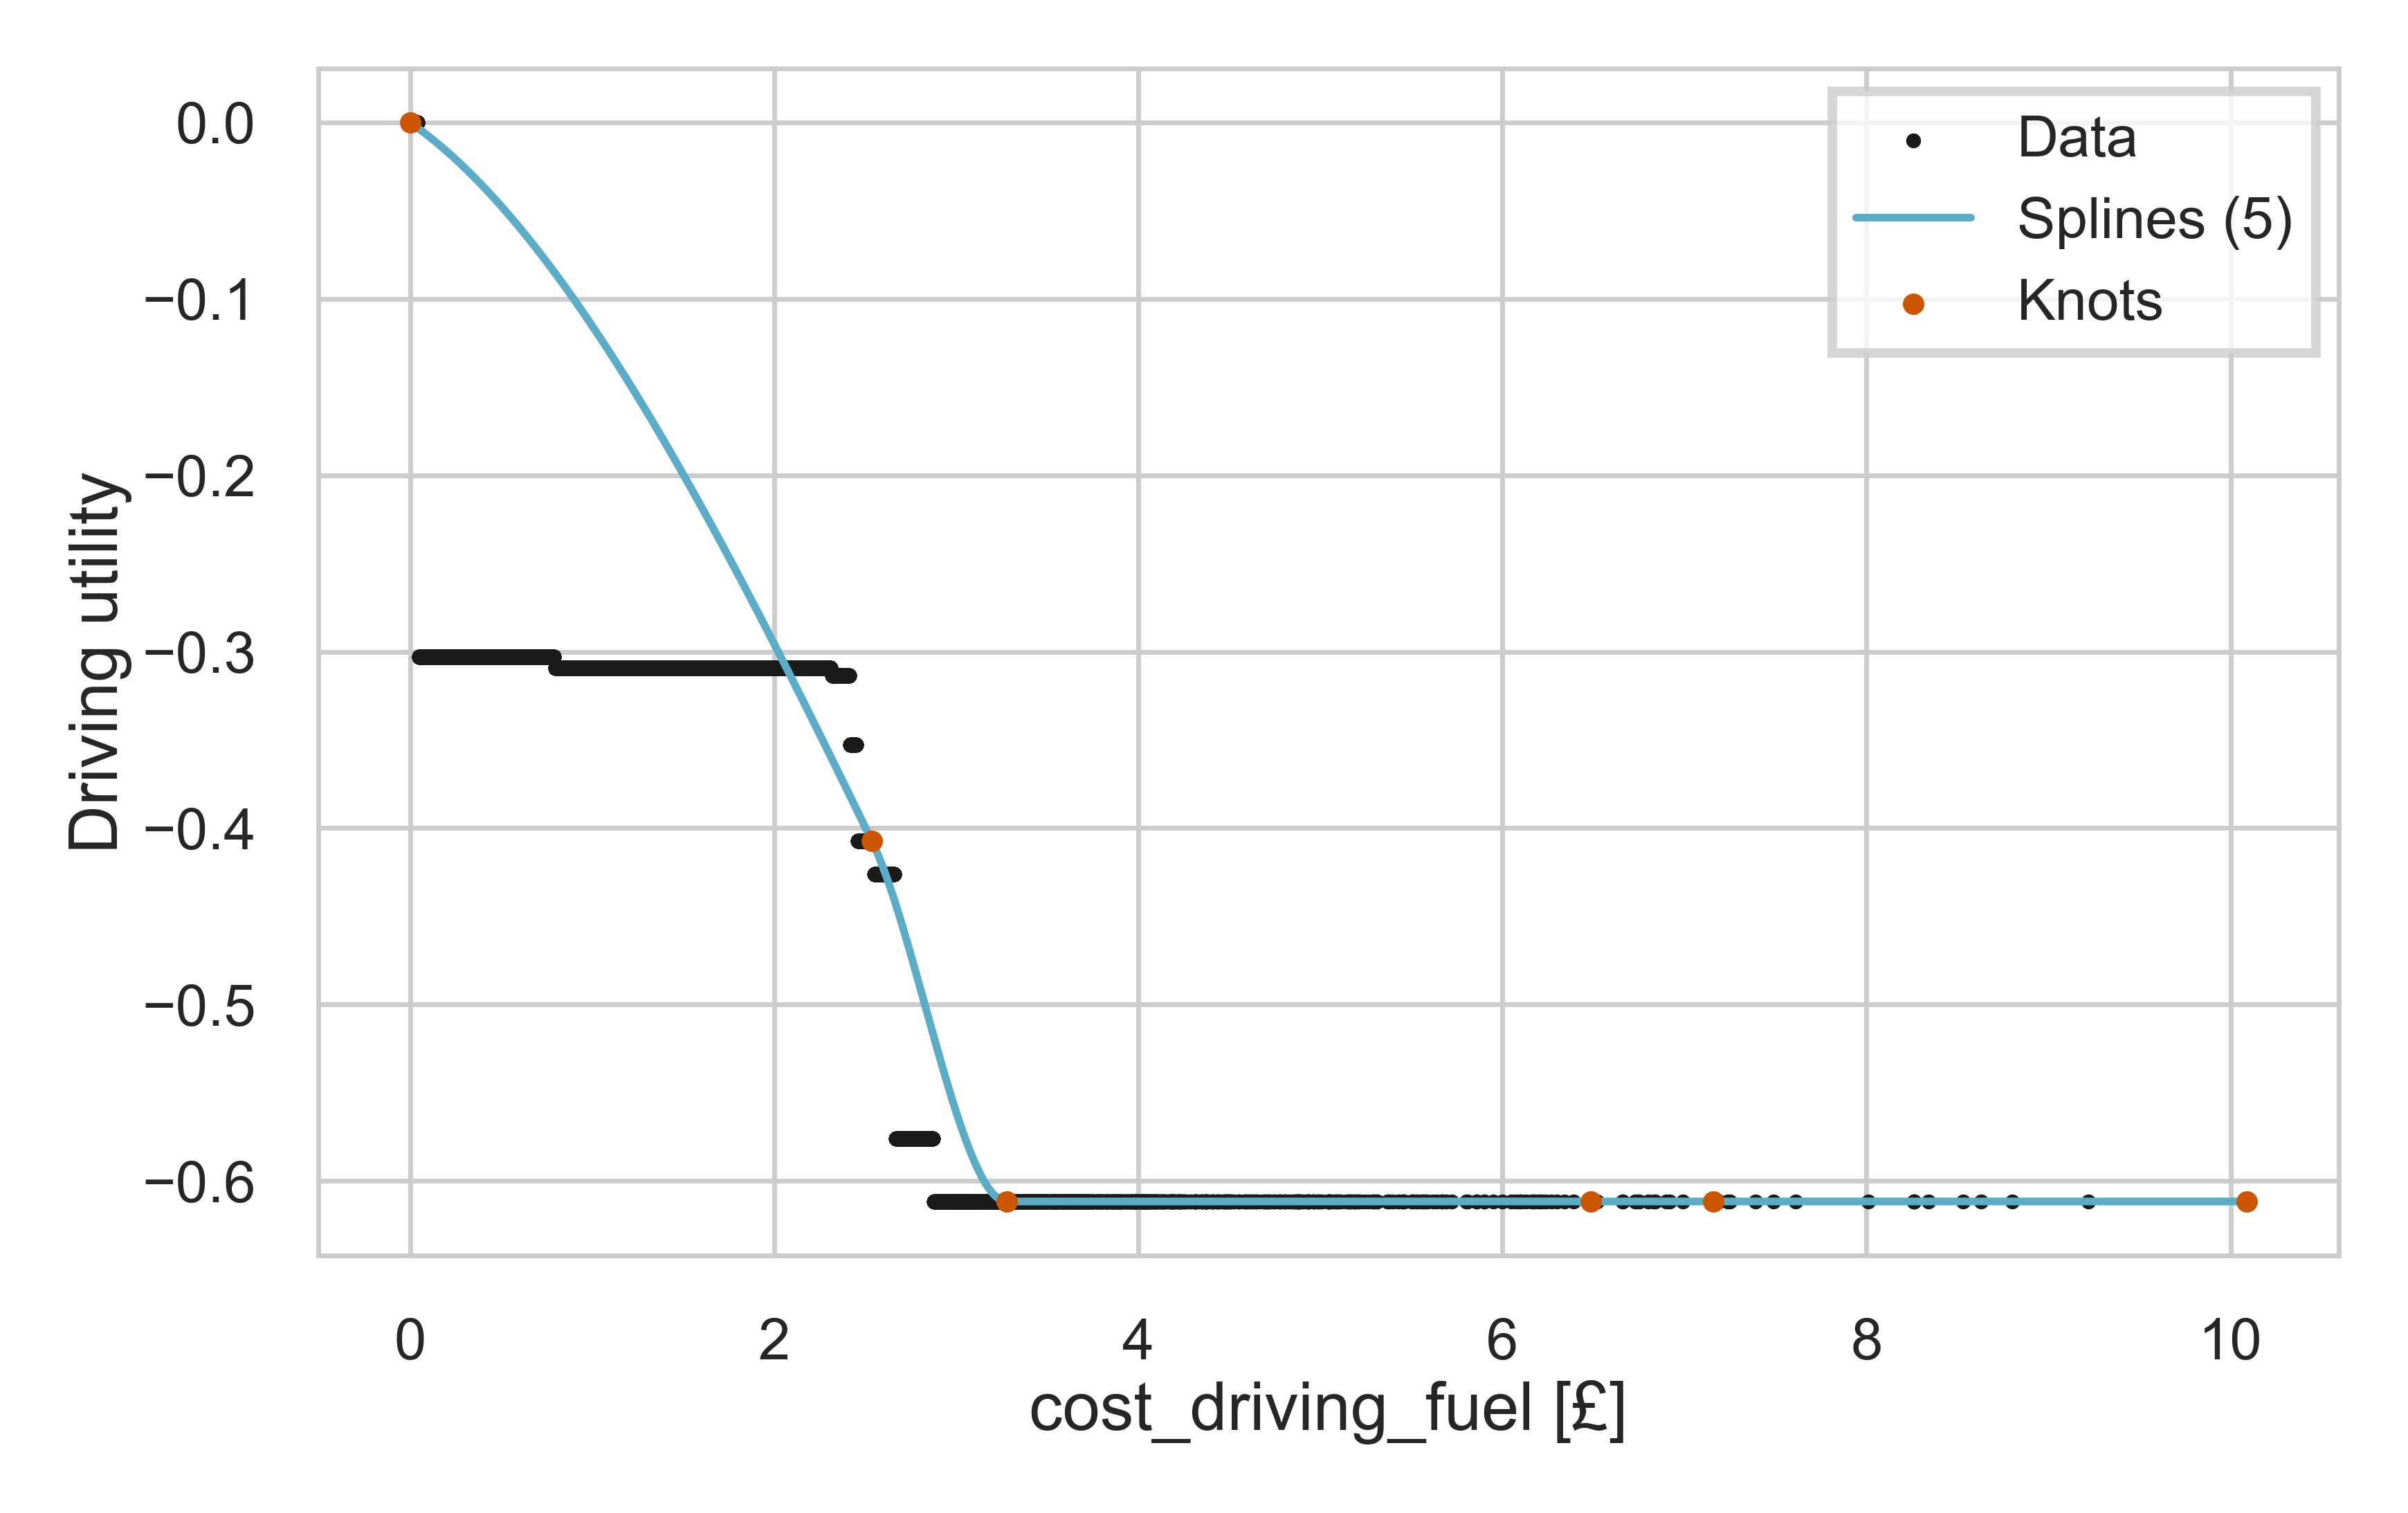

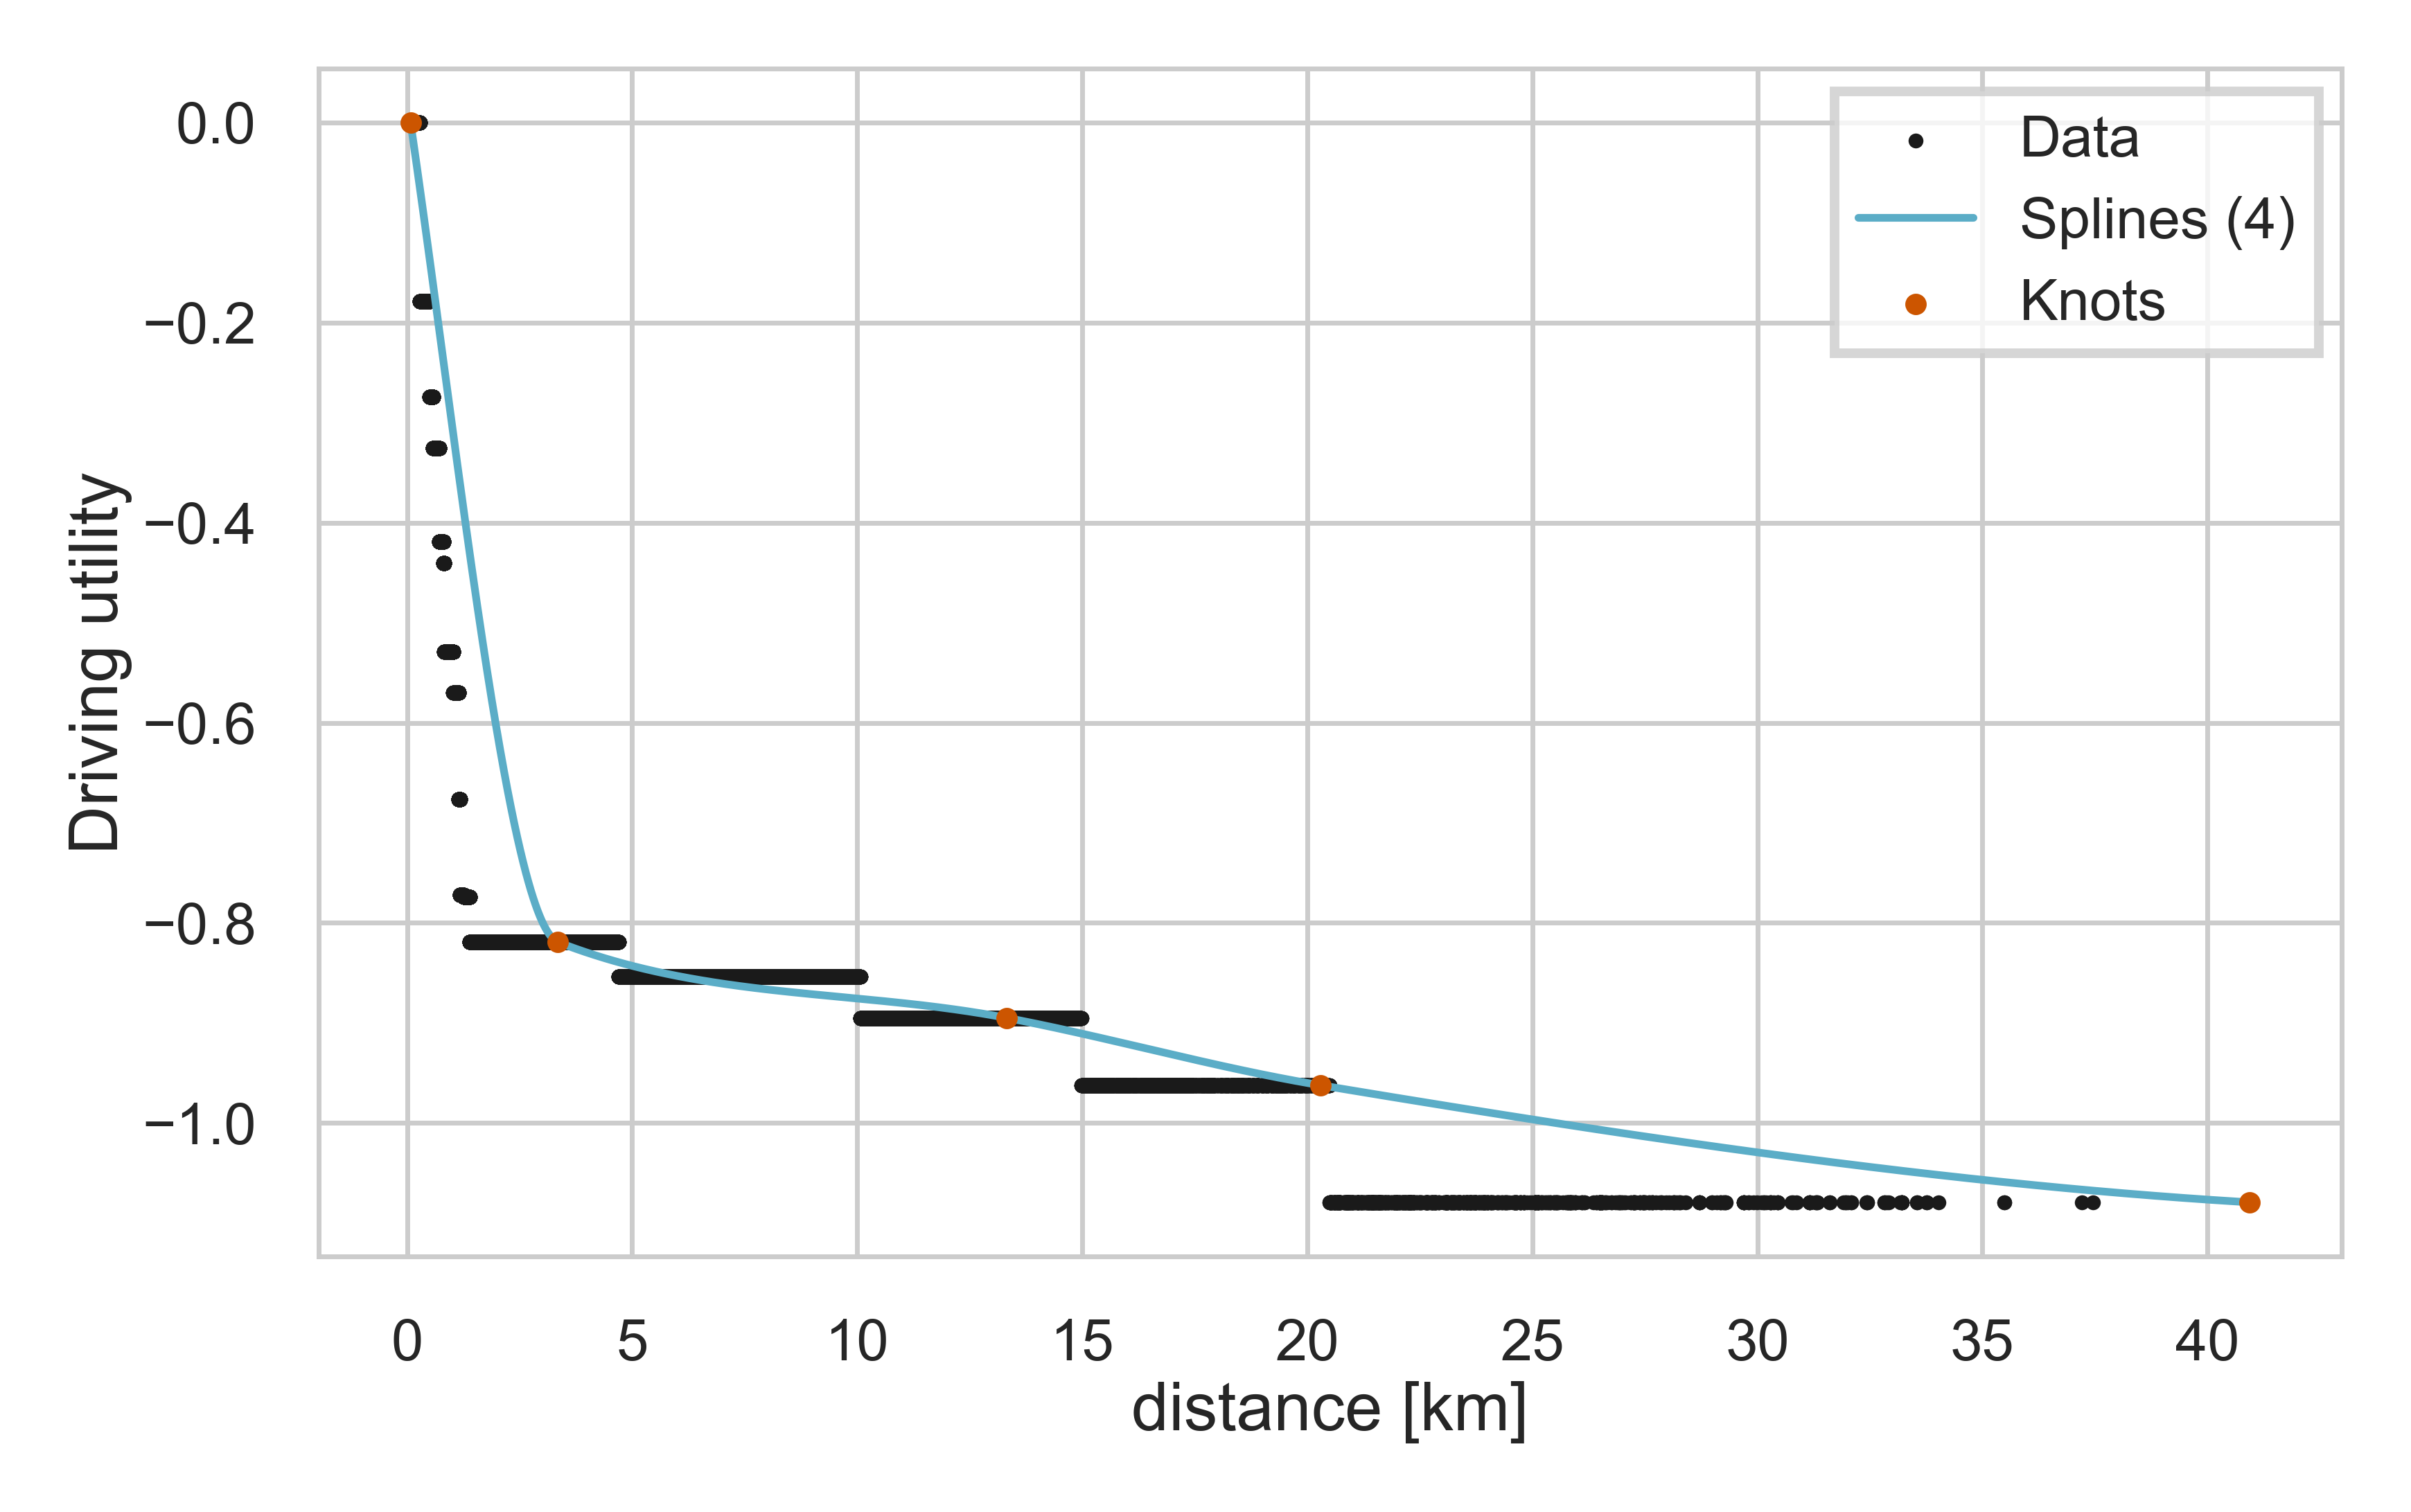

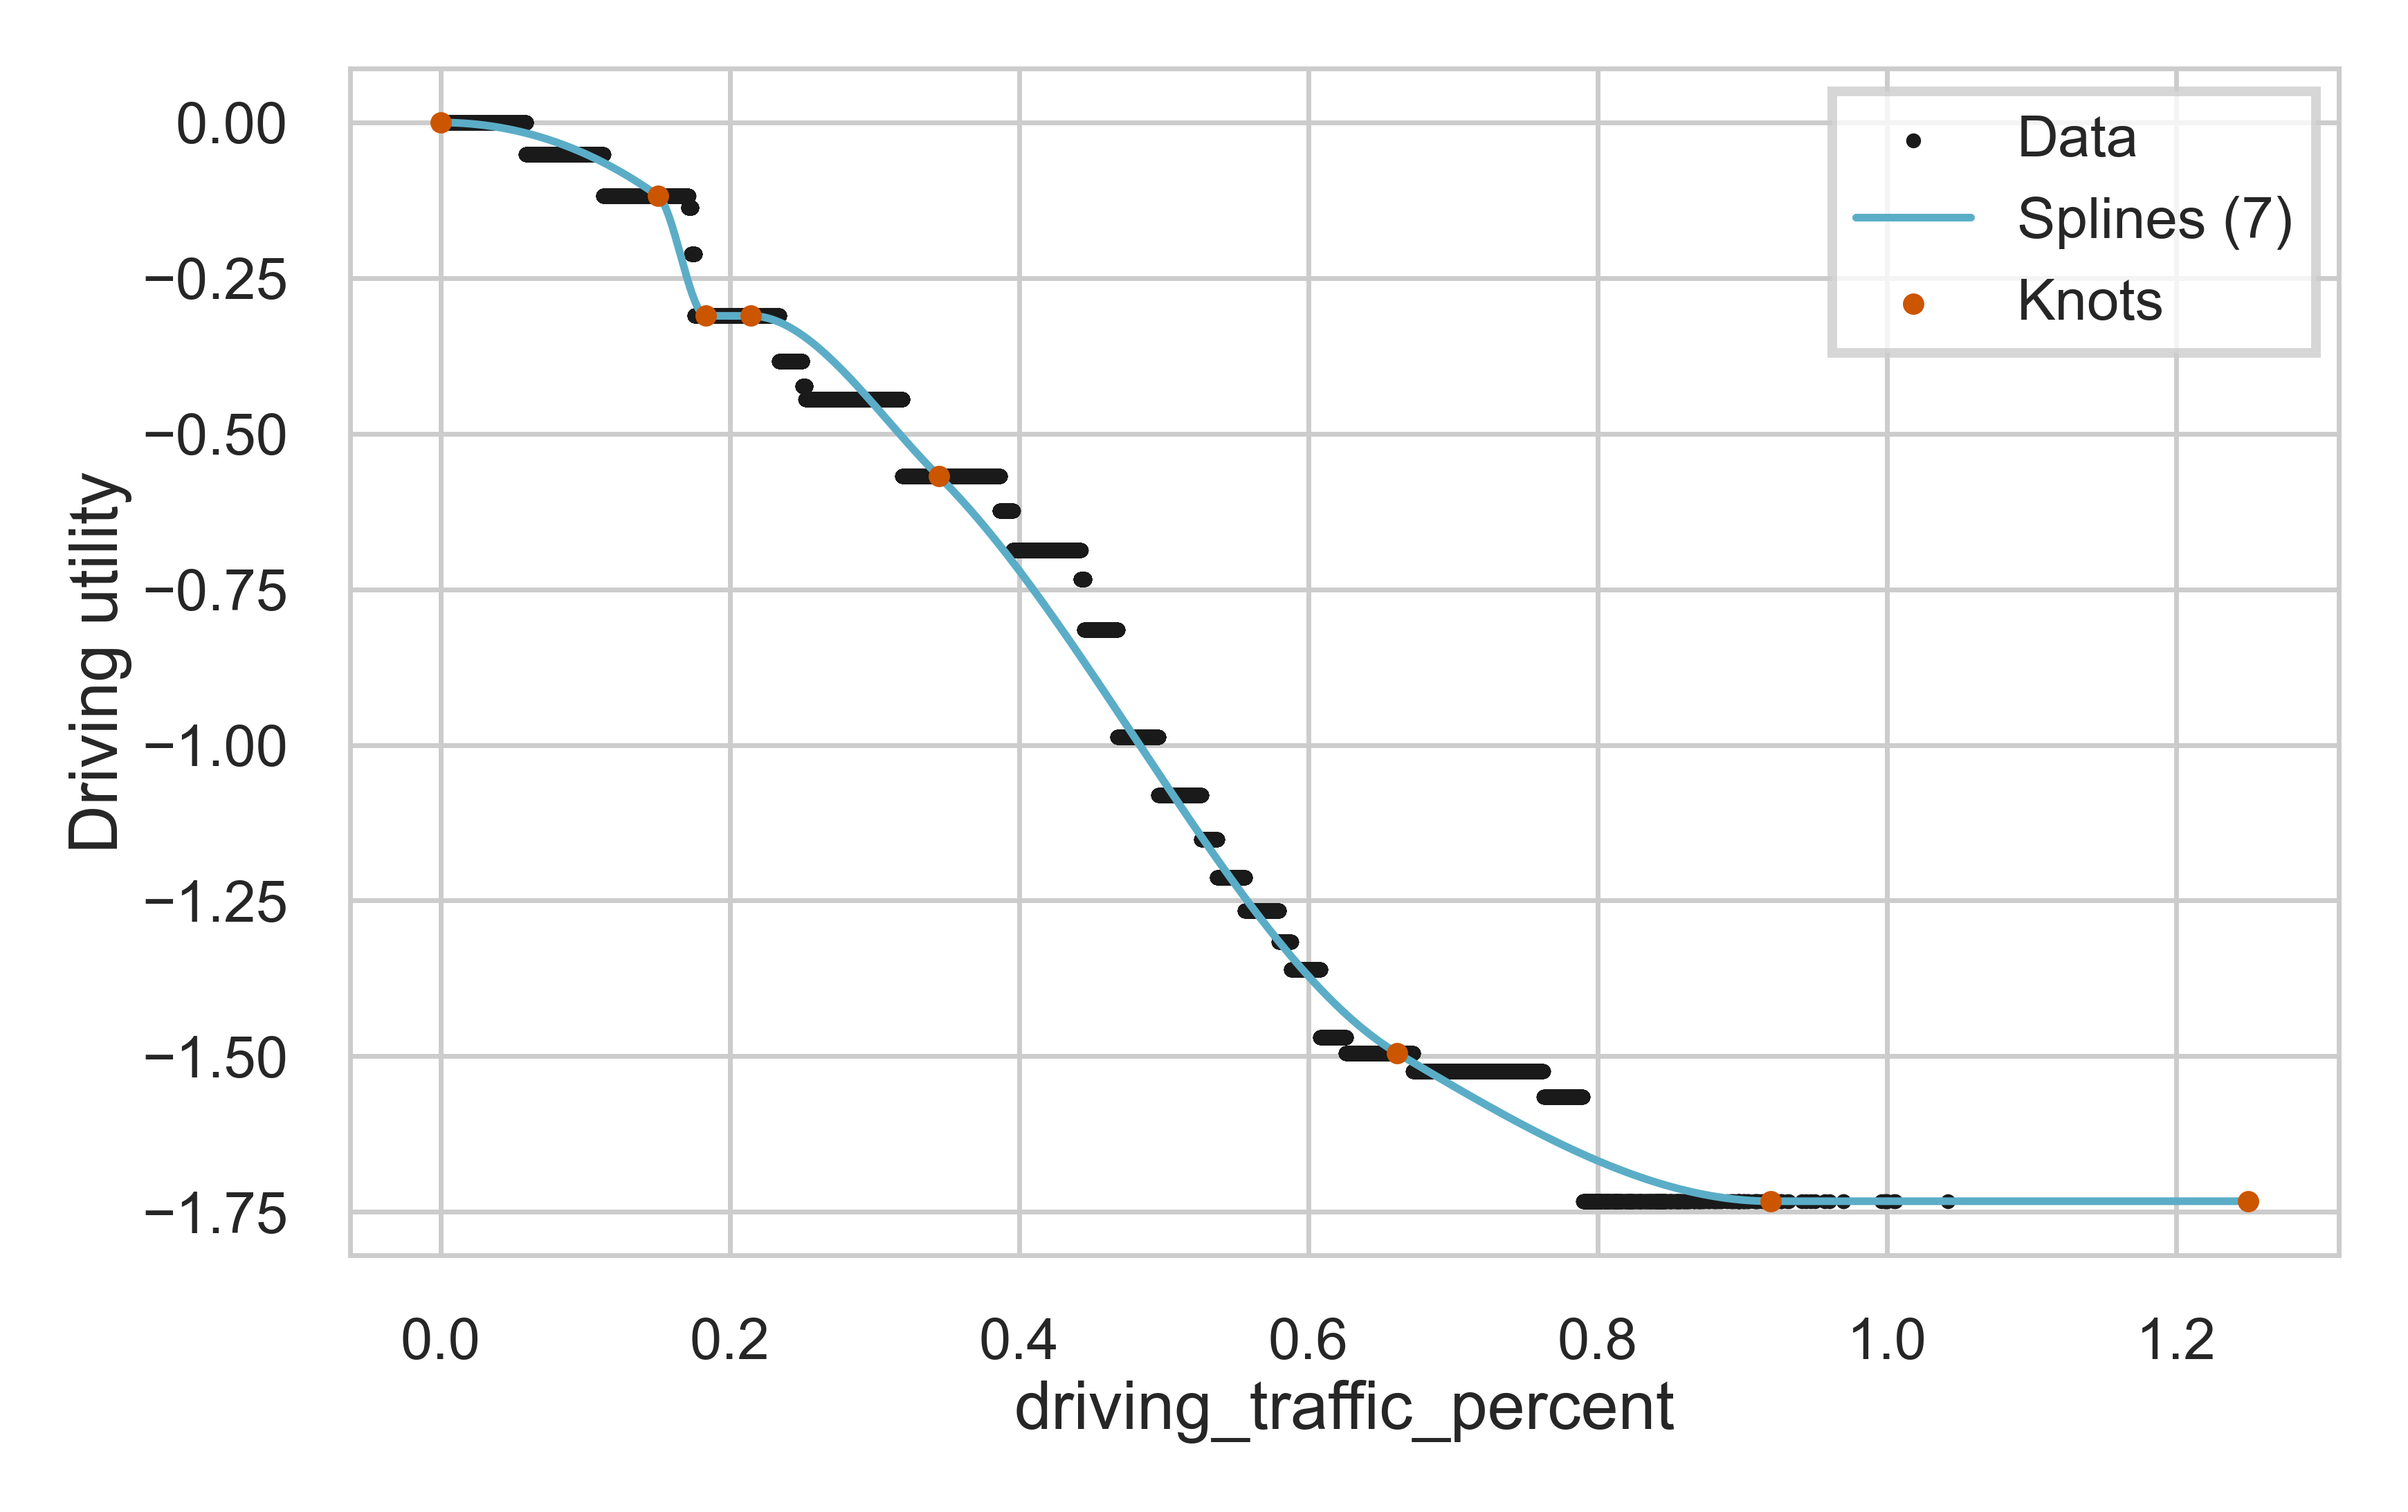

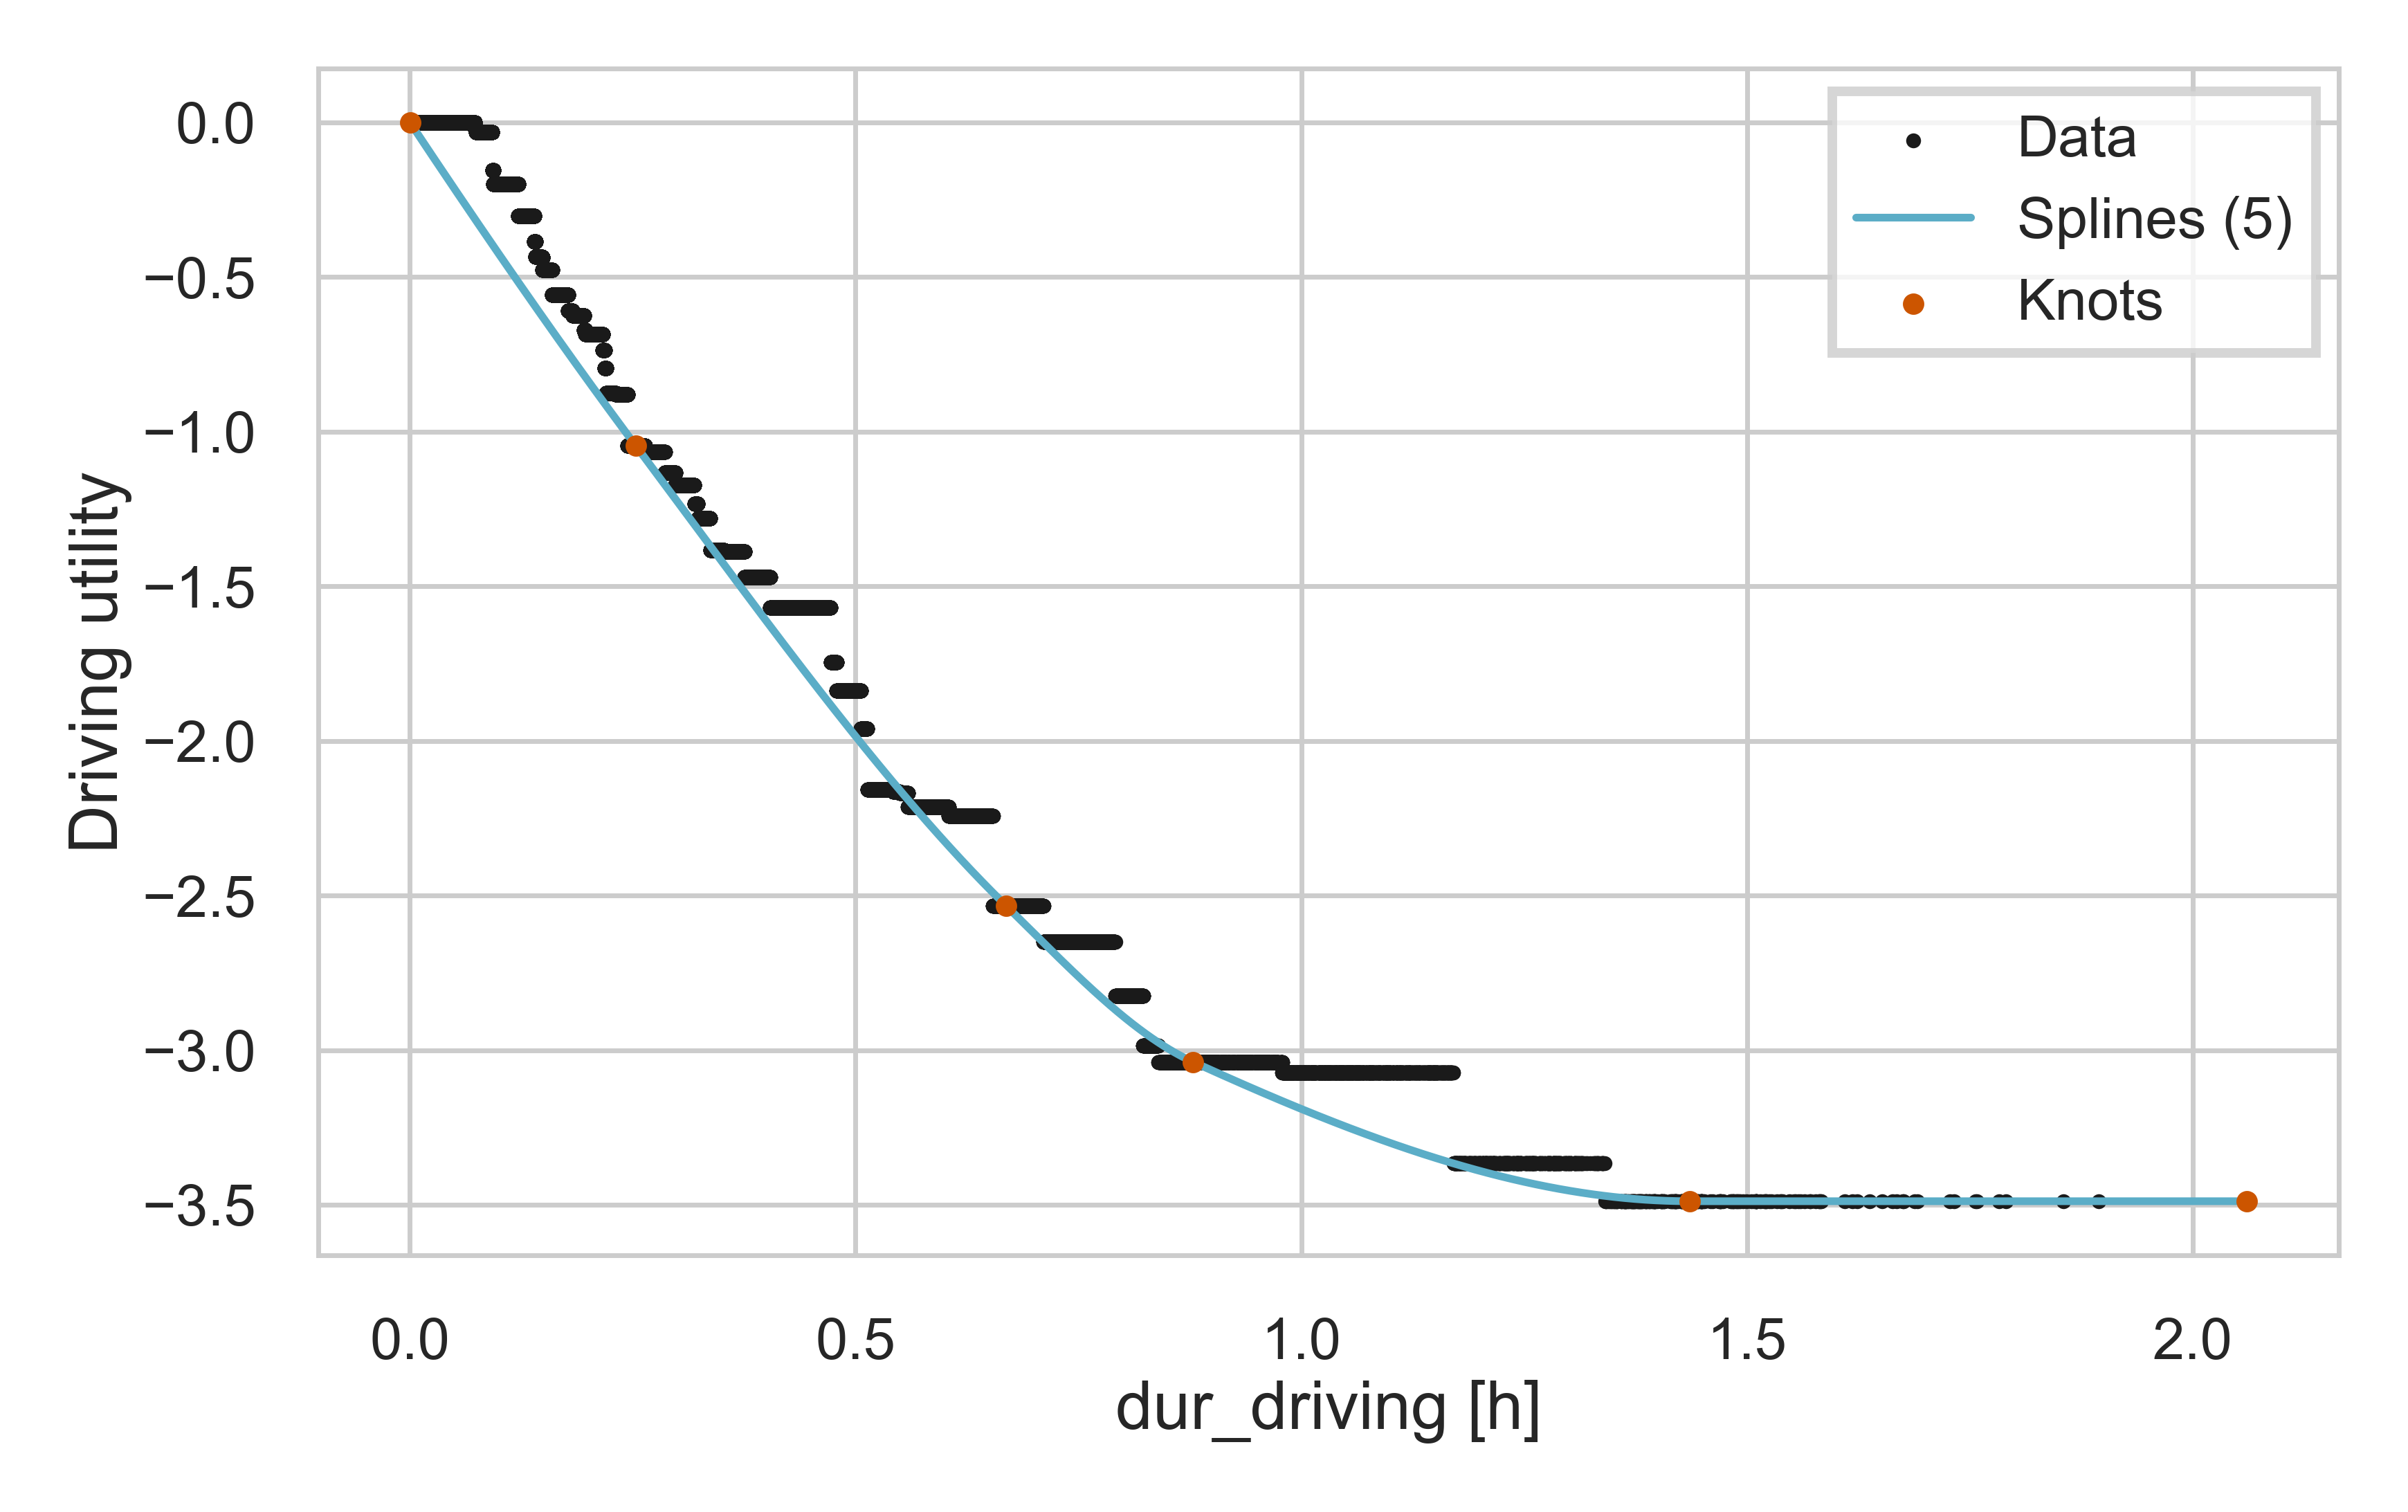

In [13]:
best_splines = spline_collection
utility_names = {'0':'Walking', '1':'Cycling', '2':'PT', '3':'Driving'}
plot_spline(LPMC_model_fully_trained,LPMC_train,best_splines, utility_names, x_knots_dict=x_knots_dict, lpmc_tt_cost=True)